In [73]:
#import modules
# https://www.datacamp.com/tutorial/discovering-hidden-topics-python
# tutorial: https://radimrehurek.com/gensim/auto_examples/howtos/run_compare_lda.html#sphx-glr-auto-examples-howtos-run-compare-lda-py

import nltk
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from urbandev.utils import load_data_csv, save_data
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import gensim
import string
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd

In [74]:
#download stopwords
download=False
if download:
    nltk.download('stopwords')
    nltk.download("wordnet")
    nltk.download("punkt")
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()



In [75]:
df = load_data_csv('/Users/ma012/Documents/Morit/10_ResearchProjects/03_UrbanDevelopmentTaiwan/data/translatedJoinProposals2.csv')

In [76]:
df.columns

Index(['Index', 'publishDate', 'url', 'title', 'proposal', 'benefits&impact',
       '#Votes', 'MinVotesNecessary', 'SubmissionDate', 'Followers',
       'Messages', 'GA', 'proposer', 'proposalEN', 'titleEN'],
      dtype='object')

In [77]:
# remove unnecessary columns
# df.drop(['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], axis = 1, inplace = True) 

In [78]:
df.head()

Index          publishDate  \
0      0  2015-09-10 13:26:19   
1      1  2015-09-10 16:08:10   
2      2  2015-09-10 19:40:31   
3      3  2015-09-10 20:45:11   
4      4  2015-09-10 21:40:32   

                                                 url  \
0  https://join.gov.tw/idea/detail/25824c17-f141-...   
1  https://join.gov.tw/idea/detail/75185e90-3a37-...   
2  https://join.gov.tw/idea/detail/4e658586-2a08-...   
3  https://join.gov.tw/idea/detail/94b5dca9-57fc-...   
4  https://join.gov.tw/idea/detail/3bdab9bf-d874-...   

                                        title  \
0                         Join 平台應提供匯出資料供批次下載   
1                  你是否贊成推動「十八歲投票權」及「二十歲被選舉權」?   
2  你是否贊成將國家撥給政黨的競選費用補助金門檻由3.5%降為3%，並設置10%的上限?   
3                                       都更的建議   
4                                        引進鞭刑   

                                            proposal  \
0  目前 Join 平台為方便機關人員作業，在後台有「打包匯出資料」的功能，但前台沒有開放給民眾...   
1  鑒於國民年滿十六歲即可工作、納稅，年滿十八歲就須負完全的刑事責任並有應考試、服公職的權利，卻...   
2  雖然之前國家撥給政黨的競選費用補助金門檻從5%下降至3.5%但仍不夠低，以國外案例來說德國為...   
3  國家既然採多數決.為何總是被少數人綁架.都更常因釘子戶造成困擾.個人建議.國家要發展.這個問...   
4               依先進國家如新加坡的刑法引進鞭刑讓重刑犯，強姦犯等重大罪犯得到應得的逞罰   

                                     benefits&impact  #Votes  \
0  這是 kiang 在 g0v 提出的想法。\n利益：提供民間備份，並可介接第三方進行全文檢索...      22   
1  世代正義是我國民主發展所必須正視的課題，\n若設置過高的年齡門檻形同將年輕世代排除在體制性的...       0   
2  修法調降政黨競選費用補助金門檻有利於小黨發展並可促進多元政黨政治發展，\n稚現行修正後之門檻...       5   
3                                                NaN       2   
4         促進社會正義，讓正義得以伸張並幫助這些罪犯記取教訓以及促進受害者人權，進而讓國家進步     184   

   MinVotesNecessary       SubmissionDate  Followers  Messages GA proposer  \
0                250  2015-09-10 17:12:05          1         0  無       au   
1                  0  2015-09-10 16:11:31          0         0  無     森里蛍一   
2                250  2015-09-22 00:45:06          1         3  無     森里蛍一   
3                250  2015-09-10 20:49:17          0         0  無      樂與喜   
4                250  2015-09-10 21:42:48          4         0  無      UFO   

                                          proposalEN  \
0  At present, the Join platform has the function...   
1  In view of the fact that citizens can work and...   
2  Although the national subsidy threshold for po...   
3  Since the country adopts a majority vote, why ...   
4  According to the criminal law of advanced coun...   

                                             titleEN  
0  The Join platform should provide export data f...  
1  Do you agree to promote "the right to vote at ...  
2  Do you favor reducing the threshold for state ...  
3                               All more suggestions  
4                                   Introduce caning

In [79]:
def reshapeData(df):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    #drop zeros
    df= df.dropna()
    df= df[df['proposalEN'] != 0]
    documents_list = [document.lower() for document in df["proposalEN"].to_list()]
    #documents_list = [document.lower() for document in documents_list]
    titles = [title.lower() for title in df["titleEN"].to_list()]
    #titles = [title.lower() for title in titles]
    print("Total Number of Documents:", len(df.index))
    return documents_list, titles

In [80]:
en_stop = set(stopwords.words('english'))

In [81]:
en_stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [84]:
def preprocess_data(doc_set, custom_stopwords={}):
    """
    Input  : document list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    en_stop = en_stop.union(custom_stopwords)
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if i not in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


In [85]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix


In [86]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel


In [87]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = models.LdaMulticore(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42, chunksize=2000,
                                alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=1)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

Total Number of Documents: 13992


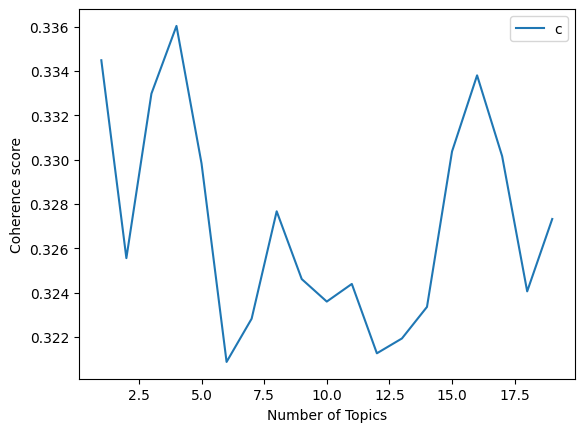

In [88]:
def plot_graph(doc_clean,start, stop, step):
    dictionary, doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

document_list, titles = reshapeData(df)
clean_text = preprocess_data(document_list)
start,stop,step=1,20,1
plot_graph(clean_text,start,stop,step)

In [89]:
# LSA Model 
number_of_topics=8
words=20
model=create_gensim_lsa_model(clean_text,number_of_topics,words)


/Users/ma012/Documents/Morit/10_ResearchProjects/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


[(0, '0.723*"fals" + 0.239*"name" + 0.239*"w" + 0.238*"prioriti" + 0.236*"lock" + 0.236*"lsdexcept" + 0.235*"semihidden" + 0.235*"unhidewhenus" + 0.168*"accent" + 0.100*"medium" + 0.081*"1" + 0.078*"2" + 0.074*"list" + 0.073*"grid" + 0.057*"shade" + 0.049*"mso" + 0.045*"3" + 0.044*"light" + 0.042*"color" + 0.038*"true"'), (1, '0.231*"peopl" + 0.197*"year" + 0.174*"taiwan" + 0.163*"time" + 0.161*"govern" + 0.160*"law" + 0.157*"1" + 0.145*"school" + 0.144*"public" + 0.140*"2" + 0.140*"use" + 0.119*"also" + 0.115*"nation" + 0.109*"mso" + 0.107*"3" + 0.097*"student" + 0.097*"countri" + 0.095*"articl" + 0.094*"high" + 0.089*"accord"'), (2, '-0.723*"mso" + -0.223*"0" + -0.222*"style" + -0.169*"languag" + -0.168*"0400" + -0.167*"0cm" + -0.166*"size" + -0.165*"font" + -0.112*"fareast" + -0.112*"roman" + -0.112*"tstyle" + -0.112*"4pt" + -0.111*"para" + -0.111*"margin" + -0.106*"famili" + -0.105*"new" + -0.097*"5" + -0.090*"time" + -0.056*"microsoftinternetexplorer4" + -0.056*"ansi"'), (3, '-0.6

In [90]:
model.print_topics()

[(0,
  '0.723*"fals" + 0.239*"name" + 0.239*"w" + 0.238*"prioriti" + 0.236*"lock" + 0.236*"lsdexcept" + 0.235*"semihidden" + 0.235*"unhidewhenus" + 0.168*"accent" + 0.100*"medium"'),
 (1,
  '0.231*"peopl" + 0.197*"year" + 0.174*"taiwan" + 0.163*"time" + 0.161*"govern" + 0.160*"law" + 0.157*"1" + 0.145*"school" + 0.144*"public" + 0.140*"2"'),
 (2,
  '-0.723*"mso" + -0.223*"0" + -0.222*"style" + -0.169*"languag" + -0.168*"0400" + -0.167*"0cm" + -0.166*"size" + -0.165*"font" + -0.112*"fareast" + -0.112*"roman"'),
 (3,
  '-0.611*"school" + -0.411*"student" + -0.270*"educ" + -0.204*"teacher" + -0.178*"high" + 0.160*"drive" + -0.132*"class" + 0.106*"driver" + -0.100*"teach" + -0.100*"learn"'),
 (4,
  '-0.320*"drive" + 0.285*"peopl" + 0.268*"taiwan" + -0.241*"driver" + 0.201*"govern" + -0.196*"licens" + -0.187*"school" + -0.185*"vehicl" + -0.173*"car" + -0.171*"road"'),
 (5,
  '-0.263*"road" + -0.217*"taiwan" + 0.205*"labor" + -0.203*"speed" + 0.197*"shall" + 0.180*"year" + 0.179*"articl" + 0

In [94]:
# LDA

# maybe add some more stopwords
# stopwords+=["\"","/","=",":","-",".","false",">",";","https", "~", "1", "2", "3", "4", "5", "6", 
#              "7", "8", "9", "<", "w", "Priority","LsdException","Locked","SemiHidden","Name", "UnhideWhenUsed",
#              "--","Accent", "!", "?", "+", "mso", "0", "*", "]", "[", "The", "'", '000']

custom_sw = {"nation", "taiwan", "public", "people", "\"","/","=",":","-",".","false",">",";","https", "~", "1", "2", "3", "4", "5", "6", 
             "7", "8", "9", "<", "w", "Priority","LsdException","Locked","SemiHidden","Name", "UnhideWhenUsed",
             "--","Accent", "!", "?", "+", "mso", "0", "*", "]", "[", "The", "'", '000', "government", "national", 
             "year", "time", }
#stopwords.append("nation")

# Tokenize the documents using jieba
tokenized_documents = preprocess_data(document_list, custom_stopwords=custom_sw)

# tokenized_documents = [preprocess_data(doc) for doc in document_list]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_documents)

# Create a bag of words corpus from the tokenized documents
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Train an LDA model
# need to finetune some of the params
num_topics = 8
lda_model = models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42, chunksize=2000,
                                alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=1)

# Display the topics
for i in range(num_topics):
    print(f"Topic {i+1}: {lda_model.print_topic(i)}")


Topic 1: 0.007*"year" + 0.006*"use" + 0.006*"time" + 0.005*"law" + 0.004*"countri" + 0.004*"caus" + 0.004*"also" + 0.004*"need" + 0.004*"school" + 0.004*"one"
Topic 2: 0.007*"year" + 0.006*"law" + 0.006*"time" + 0.005*"countri" + 0.005*"also" + 0.004*"student" + 0.004*"use" + 0.004*"school" + 0.004*"regul" + 0.004*"mani"
Topic 3: 0.007*"school" + 0.006*"use" + 0.006*"law" + 0.006*"student" + 0.005*"time" + 0.005*"year" + 0.004*"mani" + 0.004*"also" + 0.004*"one" + 0.004*"educ"
Topic 4: 0.007*"school" + 0.006*"time" + 0.006*"use" + 0.005*"year" + 0.005*"also" + 0.005*"student" + 0.005*"law" + 0.004*"high" + 0.004*"countri" + 0.004*"right"
Topic 5: 0.007*"time" + 0.006*"use" + 0.005*"year" + 0.005*"law" + 0.005*"also" + 0.004*"school" + 0.004*"countri" + 0.003*"yuan" + 0.003*"high" + 0.003*"one"
Topic 6: 0.008*"year" + 0.006*"use" + 0.006*"school" + 0.005*"also" + 0.005*"student" + 0.004*"countri" + 0.004*"high" + 0.004*"law" + 0.004*"time" + 0.004*"take"
Topic 7: 0.006*"year" + 0.006*"s

In [96]:
# TFIDF 

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]


# Train an LDA model
# need to finetune some of the params
num_topics = 8
lda_model = models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42, chunksize=2000,
                                alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=1)

# Display the topics
for i in range(num_topics):
    print(f"Topic {i+1}: {lda_model.print_topic(i)}")

KeyboardInterrupt: 

In [72]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1)],
 [(15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(28, 1), (29, 1)],
 [(30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(30, 1), (34, 1), (36, 1), (37, 1), (38, 1), (39, 1)],
 [(30, 1), (32, 1), (33, 1), (34, 1), (36, 1), (40, 1)],
 [(41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)],
 [(49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1)],
 [(56, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [(68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(40, 1),
  (73, 1),
  (76, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1)

In [19]:
# ID IFD --> not necessary for LDA, because it's already a probabilistic model

In [20]:
def concatenate_topic(topic):
    output=[]
    for i in range(len(topic)):
        output.append(topic[i][0])
    return output

In [21]:
concatenate_topic(lda_model.show_topic(3))

['educ',
 'test',
 'tax',
 'ministri',
 'vote',
 'system',
 'sexual',
 'learn',
 'pneumonia',
 'men']

In [22]:
# topics identified for n=5
# 0 education
# 1 labor law and government
# 2 school & students
# 3 driving & vehicles
# 4 crime (also drunk driving)

In [23]:
# topics identified for n=8
# 0 education & school
# 1 labor law and government
# 2 school & health system
# 3 driving & vehicles
# 4 crime (also drunk driving)

In [24]:
# topics identified for n=10
# 0 crime
# 1 water, food, power --> basic needs
# 2 medical, insurance, military
# 3 error with chinese
# 4 Traffic and urban development
# 5 animals and pets
# 6 government and china politics
# 7 tax and salary
# 8 education
# 9 error with chinese

In [25]:
recognized_topics_5 = {0: "education", 1: "labor", 2: "school", 3: "vehicles", 4: "crime"}

In [26]:
recognized_topics = {0: "crime", 1: "basicNeeds", 2: "medical", 3: "errorChin", 4:"Traffic&Cars", 5:"animals&pets", 6: "government&china", 7:"tax&salary",
                     8: "education", 9: "errorChin"}

In [27]:
for i in range(num_topics):
    print(concatenate_topic(lda_model.show_topic(i)))

['peopl', 'nation', 'govern', 'transport', 'road', 'tv', 'law', 'highway', 'station', 'ministri']
['card', 'food', 'health', 'law', 'use', 'right', 'alcohol', 'prohibit', 'plastic', 'game']
['countri', 'nation', 'referendum', 'propos', 'remov', 'marriag', 'epidem', 'pleas', 'chang', 'across']
['educ', 'test', 'tax', 'ministri', 'vote', 'system', 'sexual', 'learn', 'pneumonia', 'men']
['chang', 'licens', 'name', 'drug', 'manag', 'locomot', 'standard', 'english', 'law', 'tax']
['class', 'school', 'worker', 'hour', 'time', 'student', 'anim', 'reduc', 'number', 'salari']
['light', 'park', 'platform', 'polici', 'onlin', 'build', 'traffic', 'set', 'improv', 'space']
['law', 'amend', 'servic', 'polic', 'militari', 'regul', 'civil', 'insur', 'abolit', 'labor']
['system', 'smoke', 'car', 'motorcycl', 'add', 'nuclear', 'penalti', 'seat', 'ban', 'set']
['legal', 'cigarett', 'control', 'area', 'improv', 'teacher', 'holiday', 'medic', 'open', 'use']
['restrict', 'lower', 'examin', 'open', 'parti', 

In [28]:
recognized_topics_7 = {0: "public system", 1: "law", 2: "school", 3: "traffic and roads and taxes", 4: "vehicle, china", 5: "system", 6: "education"}

In [29]:
# Now how can I label the proposals ?

In [30]:
# visualize 

def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)


try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

In [31]:
print(models.LdaModel.__doc__)


Train and use Online Latent Dirichlet Allocation model as presented in
    `'Online Learning for LDA' by Hoffman et al.`_

    Examples
    -------
    Initialize a model using a Gensim corpus

    .. sourcecode:: pycon

        >>> from gensim.test.utils import common_corpus
        >>>
        >>> lda = LdaModel(common_corpus, num_topics=10)

    You can then infer topic distributions on new, unseen documents.

    .. sourcecode:: pycon

        >>> doc_bow = [(1, 0.3), (2, 0.1), (0, 0.09)]
        >>> doc_lda = lda[doc_bow]

    The model can be updated (trained) with new documents.

    .. sourcecode:: pycon

        >>> # In practice (corpus =/= initial training corpus), but we use the same here for simplicity.
        >>> other_corpus = common_corpus
        >>>
        >>> lda.update(other_corpus)

    Model persistency is achieved through :meth:`~gensim.models.ldamodel.LdaModel.load` and
    :meth:`~gensim.models.ldamodel.LdaModel.save` methods.

    


In [32]:
print(models.LdaModel.diff.__doc__)

Calculate the difference in topic distributions between two models: `self` and `other`.

        Parameters
        ----------
        other : :class:`~gensim.models.ldamodel.LdaModel`
            The model which will be compared against the current object.
        distance : {'kullback_leibler', 'hellinger', 'jaccard', 'jensen_shannon'}
            The distance metric to calculate the difference with.
        num_words : int, optional
            The number of most relevant words used if `distance == 'jaccard'`. Also used for annotating topics.
        n_ann_terms : int, optional
            Max number of words in intersection/symmetric difference between topics. Used for annotation.
        diagonal : bool, optional
            Whether we need the difference between identical topics (the diagonal of the difference matrix).
        annotation : bool, optional
            Whether the intersection or difference of words between two topics should be returned.
        normed : bool, optio

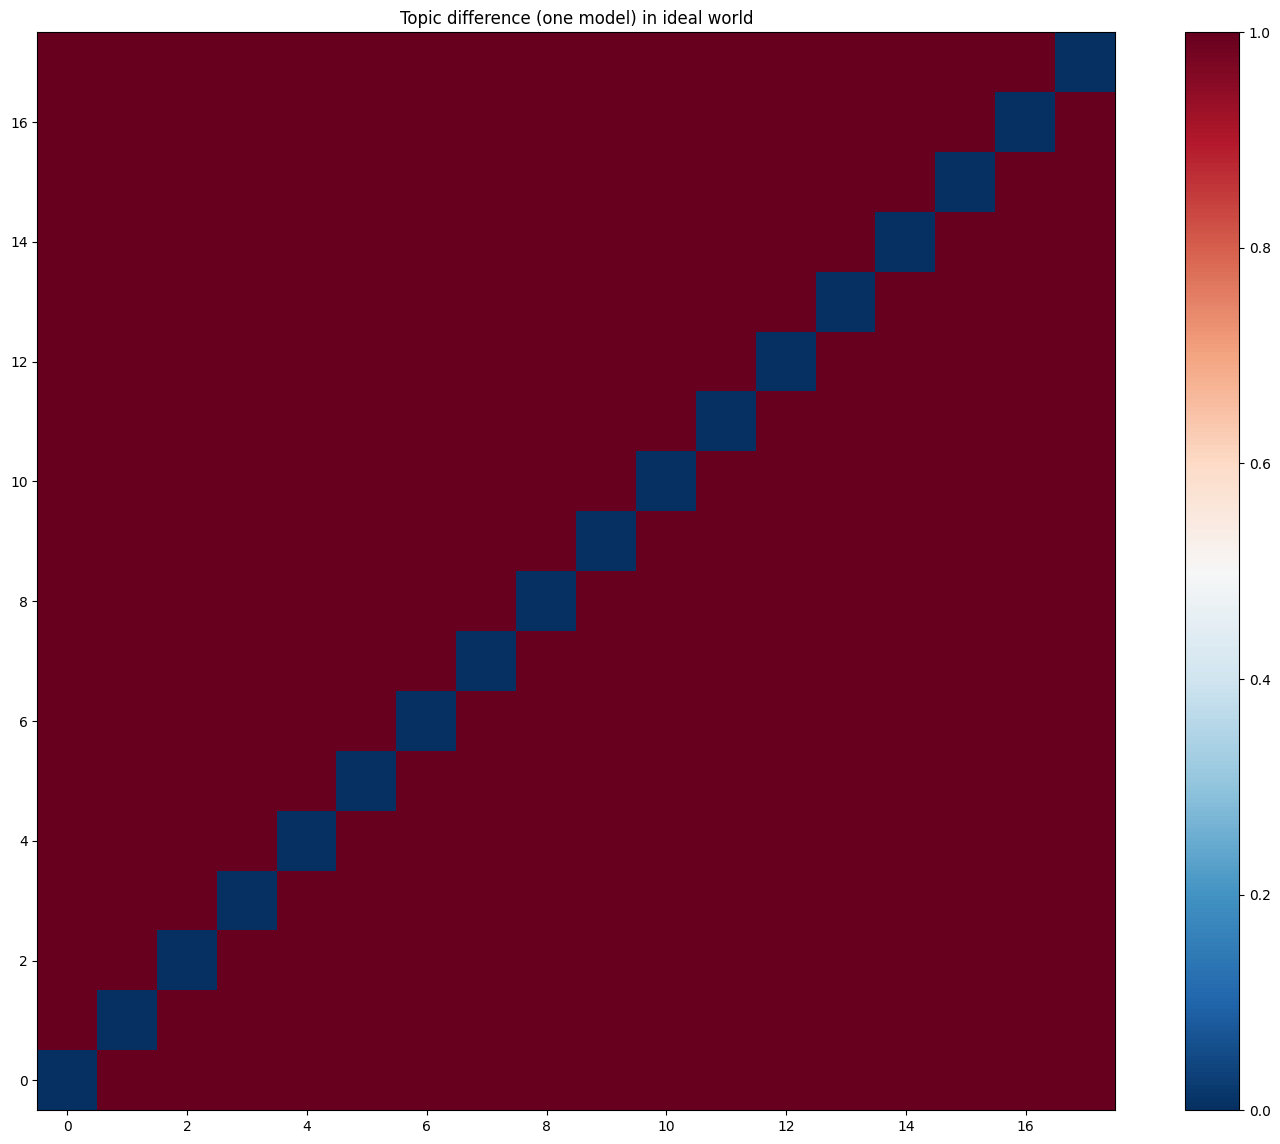

In [33]:
import numpy as np

mdiff = np.ones((num_topics, num_topics))
np.fill_diagonal(mdiff, 0.)
plot_difference(mdiff, title="Topic difference (one model) in ideal world")

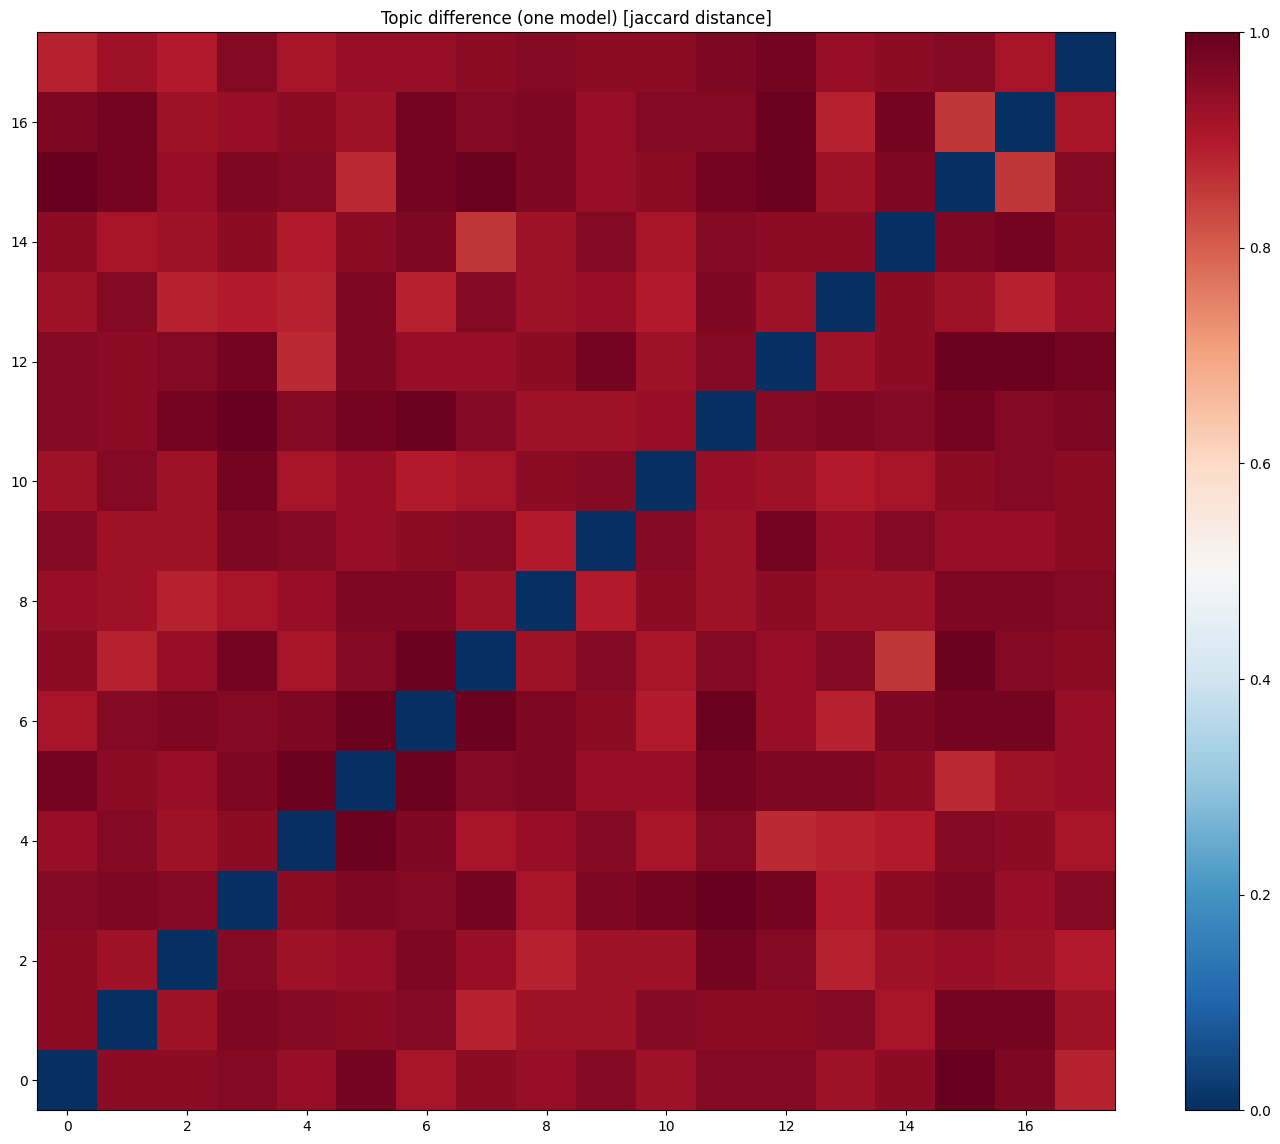

In [34]:
mdiff, annotation = lda_model.diff(lda_model, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

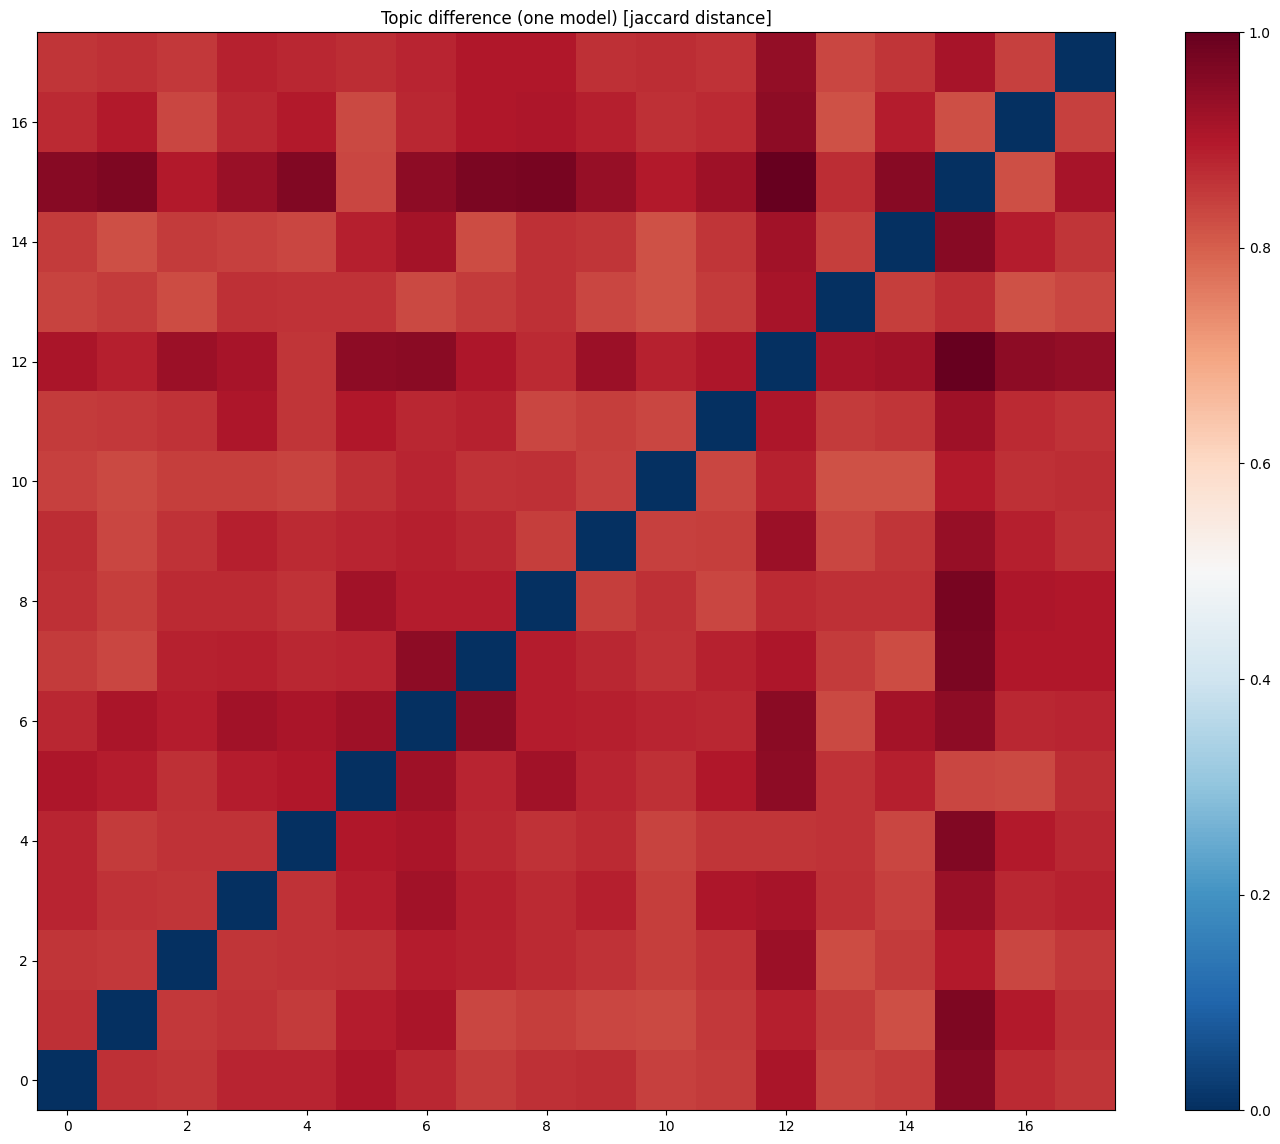

In [35]:
mdiff, annotation = lda_model.diff(lda_model, distance='hellinger', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

In [36]:
# label the df 
lda_model.get_document_topics()

TypeError: LdaModel.get_document_topics() missing 1 required positional argument: 'bow'

In [37]:
labels, _ = lda_model.inference(corpus)
topic_numbers = np.argmax(labels, axis=1)

In [38]:
labels[0]

array([0.17103758, 1.149542  , 0.20496306, 0.09420228, 0.08623686,
       0.11588018, 0.98612547, 0.31622446, 2.4668527 , 0.12353303,
       0.20526129, 0.8576749 , 0.09681107, 0.46186224, 0.09871147,
       0.07181688, 0.36970955, 0.09712143], dtype=float32)

In [39]:
multipleLabels = np.argpartition(labels, -3, axis=1)

In [40]:
multipleLabels[:, -1]

array([ 8, 11, 10, ...,  1,  1,  0])

In [41]:
df=df.dropna()
df['Topic1'] = multipleLabels[:, -1].tolist()
df['Topic2'] = multipleLabels[:, -2].tolist()
df['Topic3'] = multipleLabels[:, -3].tolist()

In [42]:
df.iloc[8]  


Index                                                                9
publishDate                                        2015-09-12 02:23:57
url                  https://join.gov.tw/idea/detail/87354c05-f36e-...
title                              敬請具體實踐中華民國憲法第143條：中華民國領土內之土地屬於國民全體。
proposal             中華民國公有土地，兩則相關條文內容如下：中華民國憲法第143條：中華民國領土內之土地屬於國民...
benefits&impact      建構「國民全體參與公有土地決策機制」之利益影響列舉如下：\n \n\n具體落實中華民國憲法第...
#Votes                                                              52
MinVotesNecessary                                                  250
SubmissionDate                                     2015-09-12 02:26:16
Followers                                                            2
Messages                                                             0
GA                                                                   無
proposer                                                   Che Wei Liu
proposalEN           The contents of the two related articles are a...
titleE

In [43]:
# need to adjust the topics here
topicLegend=recognized_topics_5
df["category1"] = df["Topic1"].apply(lambda x: topicLegend[x])
df["category2"] = df["Topic2"].apply(lambda x: topicLegend[x])
df["category3"] = df["Topic3"].apply(lambda x: topicLegend[x])

KeyError: 8

In [44]:
# how many proposals for each topic
df.groupby(['Topic2']).count()

Index  publishDate   url  title  proposal  benefits&impact  #Votes  \
Topic2                                                                       
0         474          474   474    474       474              474     474   
1         781          781   781    781       781              781     781   
2         891          891   891    891       891              891     891   
3         892          892   892    892       892              892     892   
4         868          868   868    868       868              868     868   
5         901          901   901    901       901              901     901   
6         918          918   918    918       918              918     918   
7         924          924   924    924       924              924     924   
8         553          553   553    553       553              553     553   
9         734          734   734    734       734              734     734   
10        679          679   679    679       679              679     679   
11        728          728   728    728       728              728     728   
12        776          776   776    776       776              776     776   
13        678          678   678    678       678              678     678   
14        757          757   757    757       757              757     757   
15        821          821   821    821       821              821     821   
16       1125         1125  1125   1125      1125             1125    1125   
17        492          492   492    492       492              492     492   

        MinVotesNecessary  SubmissionDate  Followers  Messages    GA  \
Topic2                                                                 
0                     474             474        474       474   474   
1                     781             781        781       781   781   
2                     891             891        891       891   891   
3                     892             892        892       892   892   
4                     868             868        868       868   868   
5                     901             901        901       901   901   
6                     918             918        918       918   918   
7                     924             924        924       924   924   
8                     553             553        553       553   553   
9                     734             734        734       734   734   
10                    679             679        679       679   679   
11                    728             728        728       728   728   
12                    776             776        776       776   776   
13                    678             678        678       678   678   
14                    757             757        757       757   757   
15                    821             821        821       821   821   
16                   1125            1125       1125      1125  1125   
17                    492             492        492       492   492   

        proposer  proposalEN  titleEN  Topic1  Topic3  
Topic2                                                 
0            474         474      474     474     474  
1            781         781      781     781     781  
2            891         891      891     891     891  
3            892         892      892     892     892  
4            868         868      868     868     868  
5            901         901      901     901     901  
6            918         918      918     918     918  
7            924         924      924     924     924  
8            553         553      553     553     553  
9            734         734      734     734     734  
10           679         679      679     679     679  
11           728         728      728     728     728  
12           776         776      776     776     776  
13           678         678      678     678     678  
14           757         757      757     757     757  
15           821         821      821     821     821 

<Axes: xlabel='Topic1'>

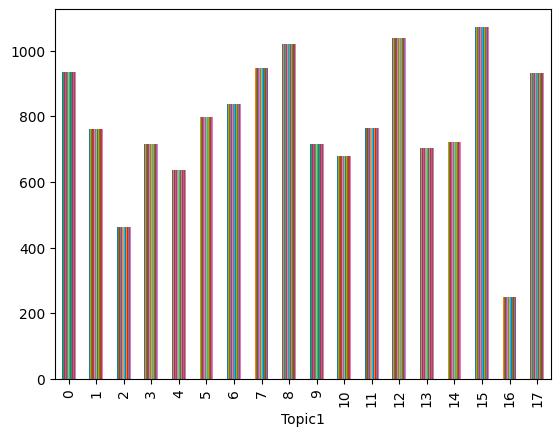

In [45]:
df.groupby(['Topic1']).count().plot(kind='bar', legend=False,)

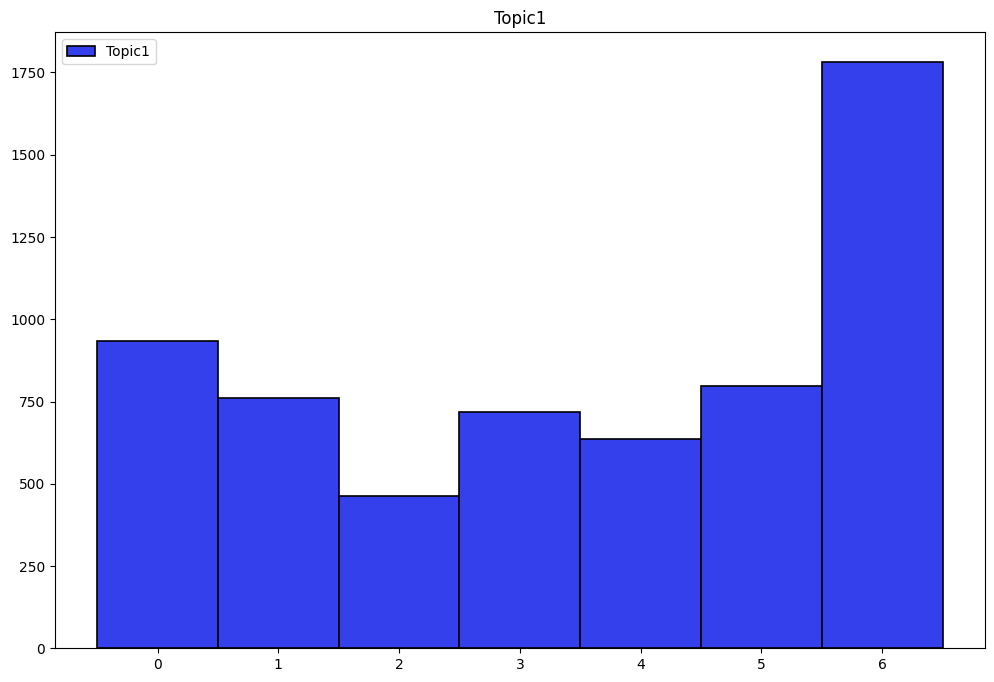

In [46]:
ax = df.hist(column='Topic1', bins=range(8),
grid=False, figsize=(12,8), color='#3440eb', legend=True, edgecolor='black', linewidth=1.2, align='left')

In [47]:
recognized_topics_7

{0: 'public system',
 1: 'law',
 2: 'school',
 3: 'traffic and roads and taxes',
 4: 'vehicle, china',
 5: 'system',
 6: 'education'}

In [48]:
df.columns

Index(['Index', 'publishDate', 'url', 'title', 'proposal', 'benefits&impact',
       '#Votes', 'MinVotesNecessary', 'SubmissionDate', 'Followers',
       'Messages', 'GA', 'proposer', 'proposalEN', 'titleEN', 'Topic1',
       'Topic2', 'Topic3'],
      dtype='object')

In [49]:
# need to clean the data better, since there is some issues with data jumping into the wrong column
for index, row in df.iterrows():
    if not str(row["#Votes"]).isnumeric():
        print(index)
        df.at[index,'#Votes']=0
    if not str(row["MinVotesNecessary"]).isnumeric():
        df.at[index, "MinVotesNecessary"]=5000
        print(index)

In [50]:
df.iloc[100]

Index                                                              139
publishDate                                        2016-06-15 19:40:38
url                  https://join.gov.tw/idea/detail/79d35ea8-455e-...
title                         如何讓南部地區太陽能發電，加速屋頂太陽能發電，使老百姓願意投資並提早完成非核家園
proposal             因政府財政困難，又要找地還要花錢建置並維護，現行太陽能屋頂發電尤以台南申請件數最多，如果使用...
benefits&impact      利益，老百姓可以從發電賺到錢，政府可以省下找地及建置(含維護費用)，當然如能時進行更佳，不過...
#Votes                                                               5
MinVotesNecessary                                                  250
SubmissionDate                                     2016-06-15 19:42:19
Followers                                                            1
Messages                                                             0
GA                                                                   無
proposer                                                          蓋故 動
proposalEN           Due to the government’s financial difficulties...
titleE

In [51]:
df["MinVotesNecessary"] = pd.to_numeric(df["MinVotesNecessary"])
df["#Votes"] = pd.to_numeric(df["#Votes"])

In [52]:
df.dtypes

Index                 int64
publishDate          object
url                  object
title                object
proposal             object
benefits&impact      object
#Votes                int64
MinVotesNecessary     int64
SubmissionDate       object
Followers             int64
Messages              int64
GA                   object
proposer             object
proposalEN           object
titleEN              object
Topic1                int64
Topic2                int64
Topic3                int64
dtype: object

In [53]:
# passed votes
PassedProposalsTraffic = df.loc[(df['category1'].isin([recognized_topics_7[3], recognized_topics_7[4]])) & (df["#Votes"]>df['MinVotesNecessary'])]

KeyError: 'category1'

In [58]:
PassedProposalsTraffic

NameError: name 'PassedProposalsTraffic' is not defined

In [59]:
save_data(PassedProposalsTraffic, "./results/PassedProposalsTrafficSecondTry.csv")

NameError: name 'PassedProposalsTraffic' is not defined

In [54]:
# evaluation with coherence model
cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass') # measures : {'u_mass', 'c_v', 'c_uci', 'c_npmi'}
coherence = cm.get_coherence()  # get coherence value
print(f"The u_mass for the current model is {coherence}")

# to compare two coherence models 
# cm = CoherenceModel.for_models([m1, m2], common_dictionary, corpus=common_corpus, coherence='u_mass')


The u_mass for the current model is -8.259067993358267


In [55]:
# fix the 
cm = CoherenceModel(model=lda_model, dictionary=dictionary, texts=corpus, coherence='c_v')
print(f"the coherence of the topics is {cm.get_coherence()}")

the coherence of the topics is nan


/Users/ma012/Documents/Morit/10_ResearchProjects/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/Users/ma012/Documents/Morit/10_ResearchProjects/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [56]:
# implement the nice visualization with terms and intertopic distance
# implement the word cloud for the given topics
# tune this notebook with a few more tricks from the source

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15    -0.227306  0.040682       1        1  5.903051
7      0.074769  0.115347       2        1  5.822446
12     0.127650  0.015567       3        1  5.774934
6     -0.033128 -0.196308       4        1  5.755369
5     -0.123356  0.095494       5        1  5.664637
1      0.083673  0.041845       6        1  5.602028
14     0.067290  0.067557       7        1  5.558414
3      0.015162  0.066695       8        1  5.529990
0      0.038104 -0.049741       9        1  5.524696
11     0.027727 -0.079936      10        1  5.484015
4      0.080064  0.028057      11        1  5.482847
17    -0.043464 -0.032077      12        1  5.478191
9      0.020243 -0.031892      13        1  5.466938
8      0.094780 -0.059574      14        1  5.458716
13    -0.043330 -0.044459      15        1  5.430695
16    -0.136089  0.001483      16        1  5.410829
10     0.013813  0.013301      17        1  5.383273
2     -0.036603  0.007960      18        1  5.268928, topic_info=        Term         Freq        Total Category  logprob  loglift
173   school  1299.000000  1299.000000  Default  30.0000  30.0000
299     high   741.000000   741.000000  Default  29.0000  29.0000
164    drive   558.000000   558.000000  Default  28.0000  28.0000
112     educ   586.000000   586.000000  Default  27.0000  27.0000
537    drunk   324.000000   324.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
66    number    31.729299   291.785168  Topic18  -5.4085   0.7246
328      law    34.144228   918.125315  Topic18  -5.3351  -0.3484
173   school    34.591737  1299.972874  Topic18  -5.3221  -0.6831
695     name    31.104296   272.559032  Topic18  -5.4284   0.7728
1032     ban    29.449729   212.495060  Topic18  -5.4830   0.9671

[1312 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2407      1  0.559315    00
2407      4  0.012429    00
2407      5  0.136721    00
2407     15  0.012429    00
2407     16  0.161580    00
...     ...       ...   ...
1135     10  0.019088  zone
1135     11  0.038175  zone
1135     12  0.152702  zone
1135     16  0.668069  zone
1135     18  0.038175  zone

[6995 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 8, 13, 7, 6, 2, 15, 4, 1, 12, 5, 18, 10, 9, 14, 17, 11, 3])

In [57]:
wordcloudpreprocess = [" ".join(doc) for doc in tokenized_documents]

In [58]:
wordcloudinput = ' '.join(wordcloudpreprocess)

/Users/ma012/Documents/Morit/10_ResearchProjects/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


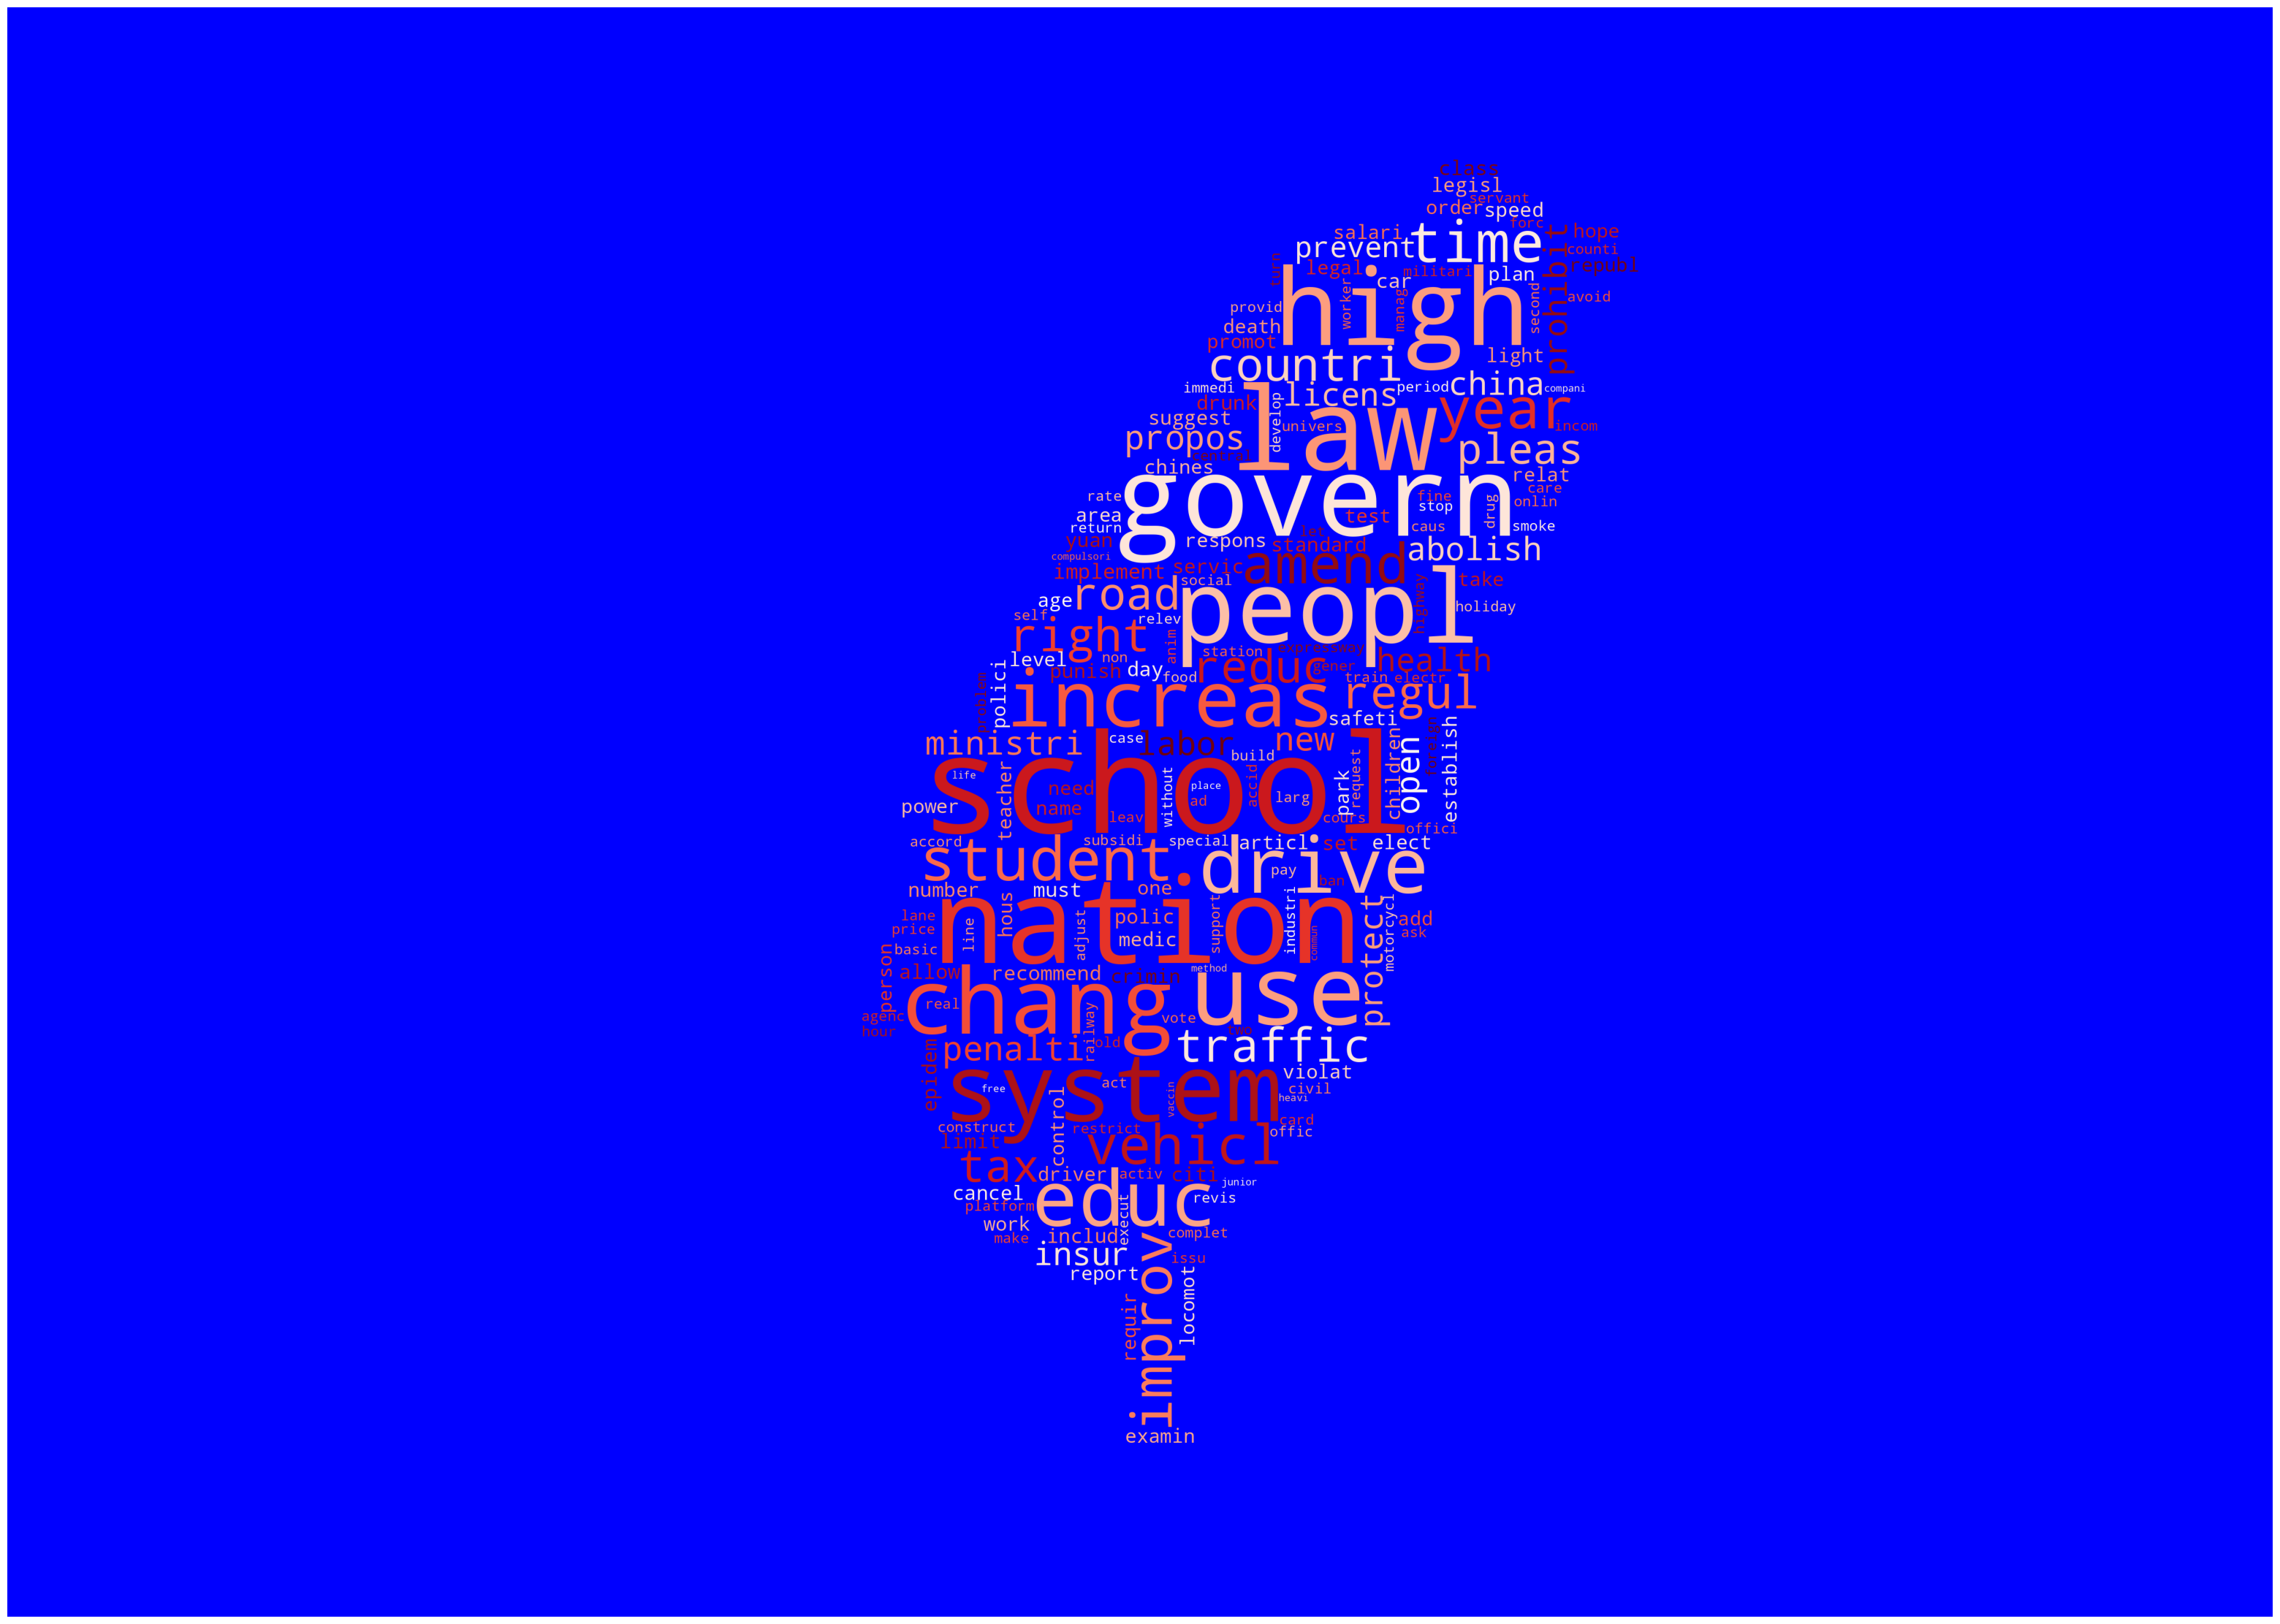

In [59]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
# Generate word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

mask = np.array(Image.open('./data/images/maskTaiwan3.jpg'))

wordcloud = WordCloud(mask=mask, width=mask.shape[1],
                      height=mask.shape[0], random_state=35, 
                      background_color='blue', colormap='Reds', collocations=False, 
                      stopwords = STOPWORDS).generate(wordcloudinput)
# Plot
plot_cloud(wordcloud)

/home/mojoee/Research/11_UrbanDevelopment/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


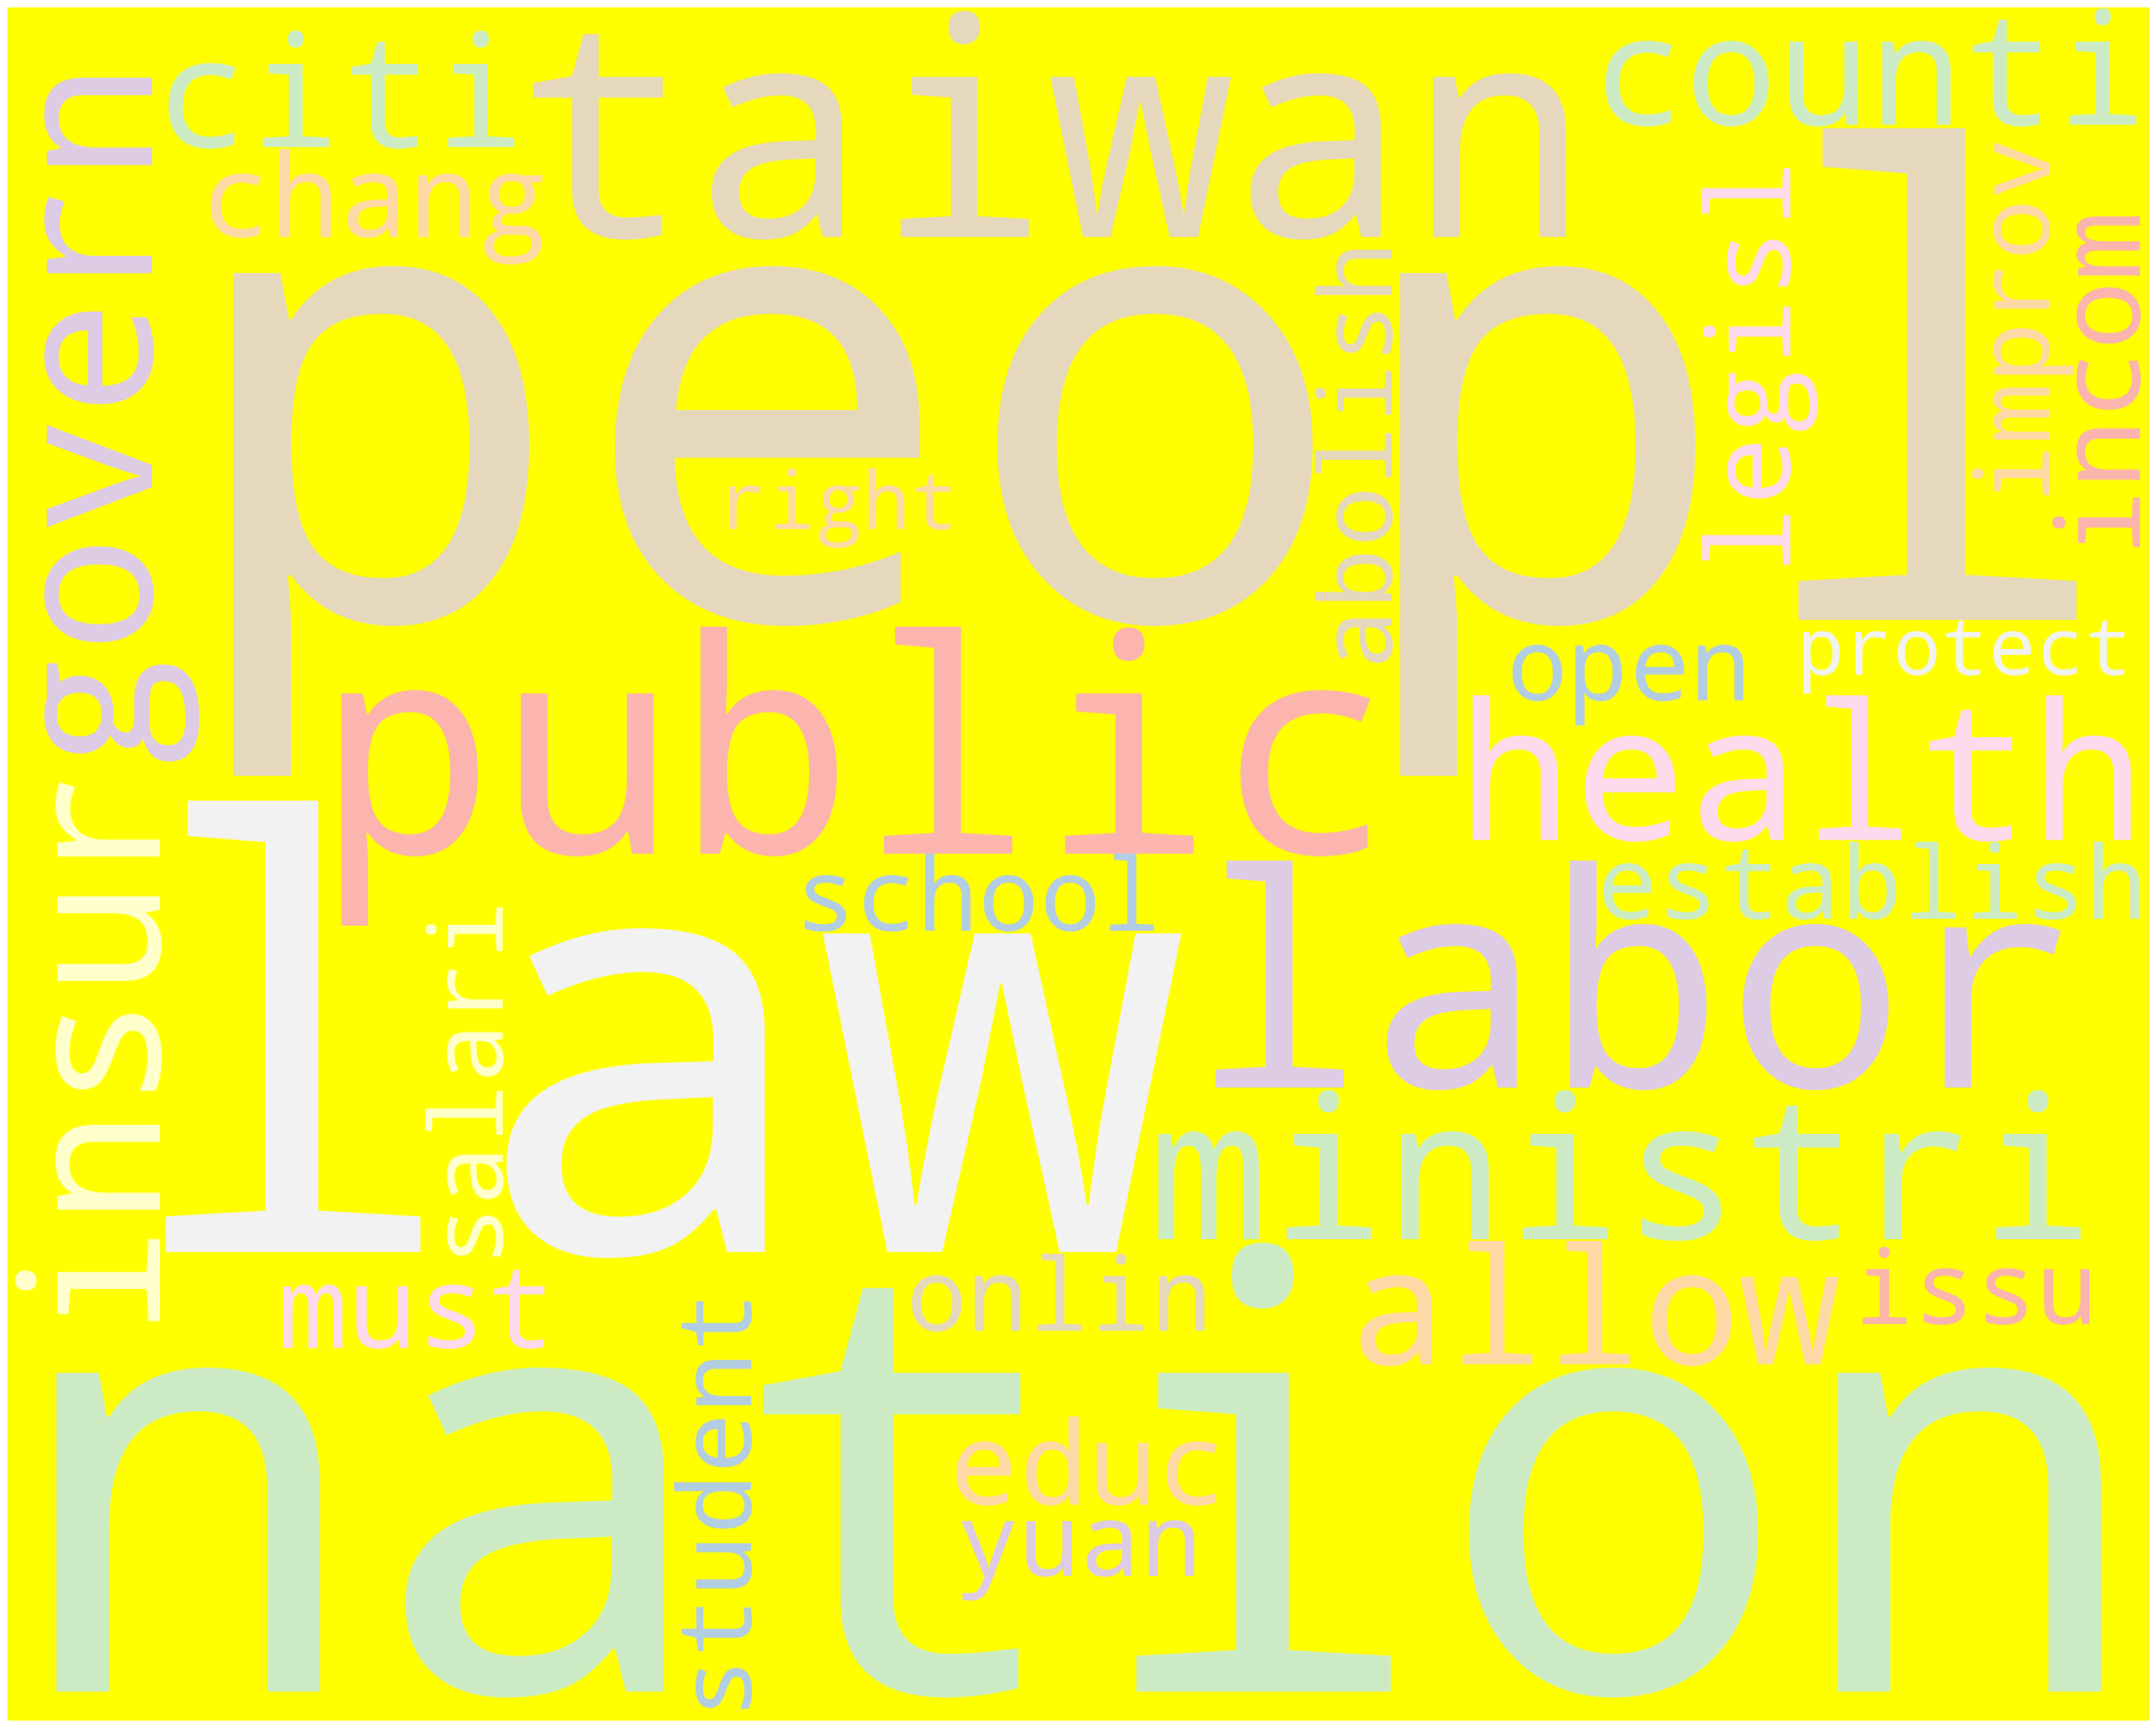

In [204]:
# topic 1

def create_wc_topic(topicID, color, wordN=30):
    #topicID = 0
    inputwordcloud = ""
    top_terms = lda_model.get_topic_terms(topicID, wordN)
    for term in top_terms:
        inputwordcloud += " " + dictionary[term[0]]

    wordcloud = WordCloud(width = 2500, height = 2000, random_state=35, background_color=color, colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(inputwordcloud)
    # Plot
    plot_cloud(wordcloud)

create_wc_topic(0, color="yellow", wordN=30)

/home/mojoee/Research/11_UrbanDevelopment/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


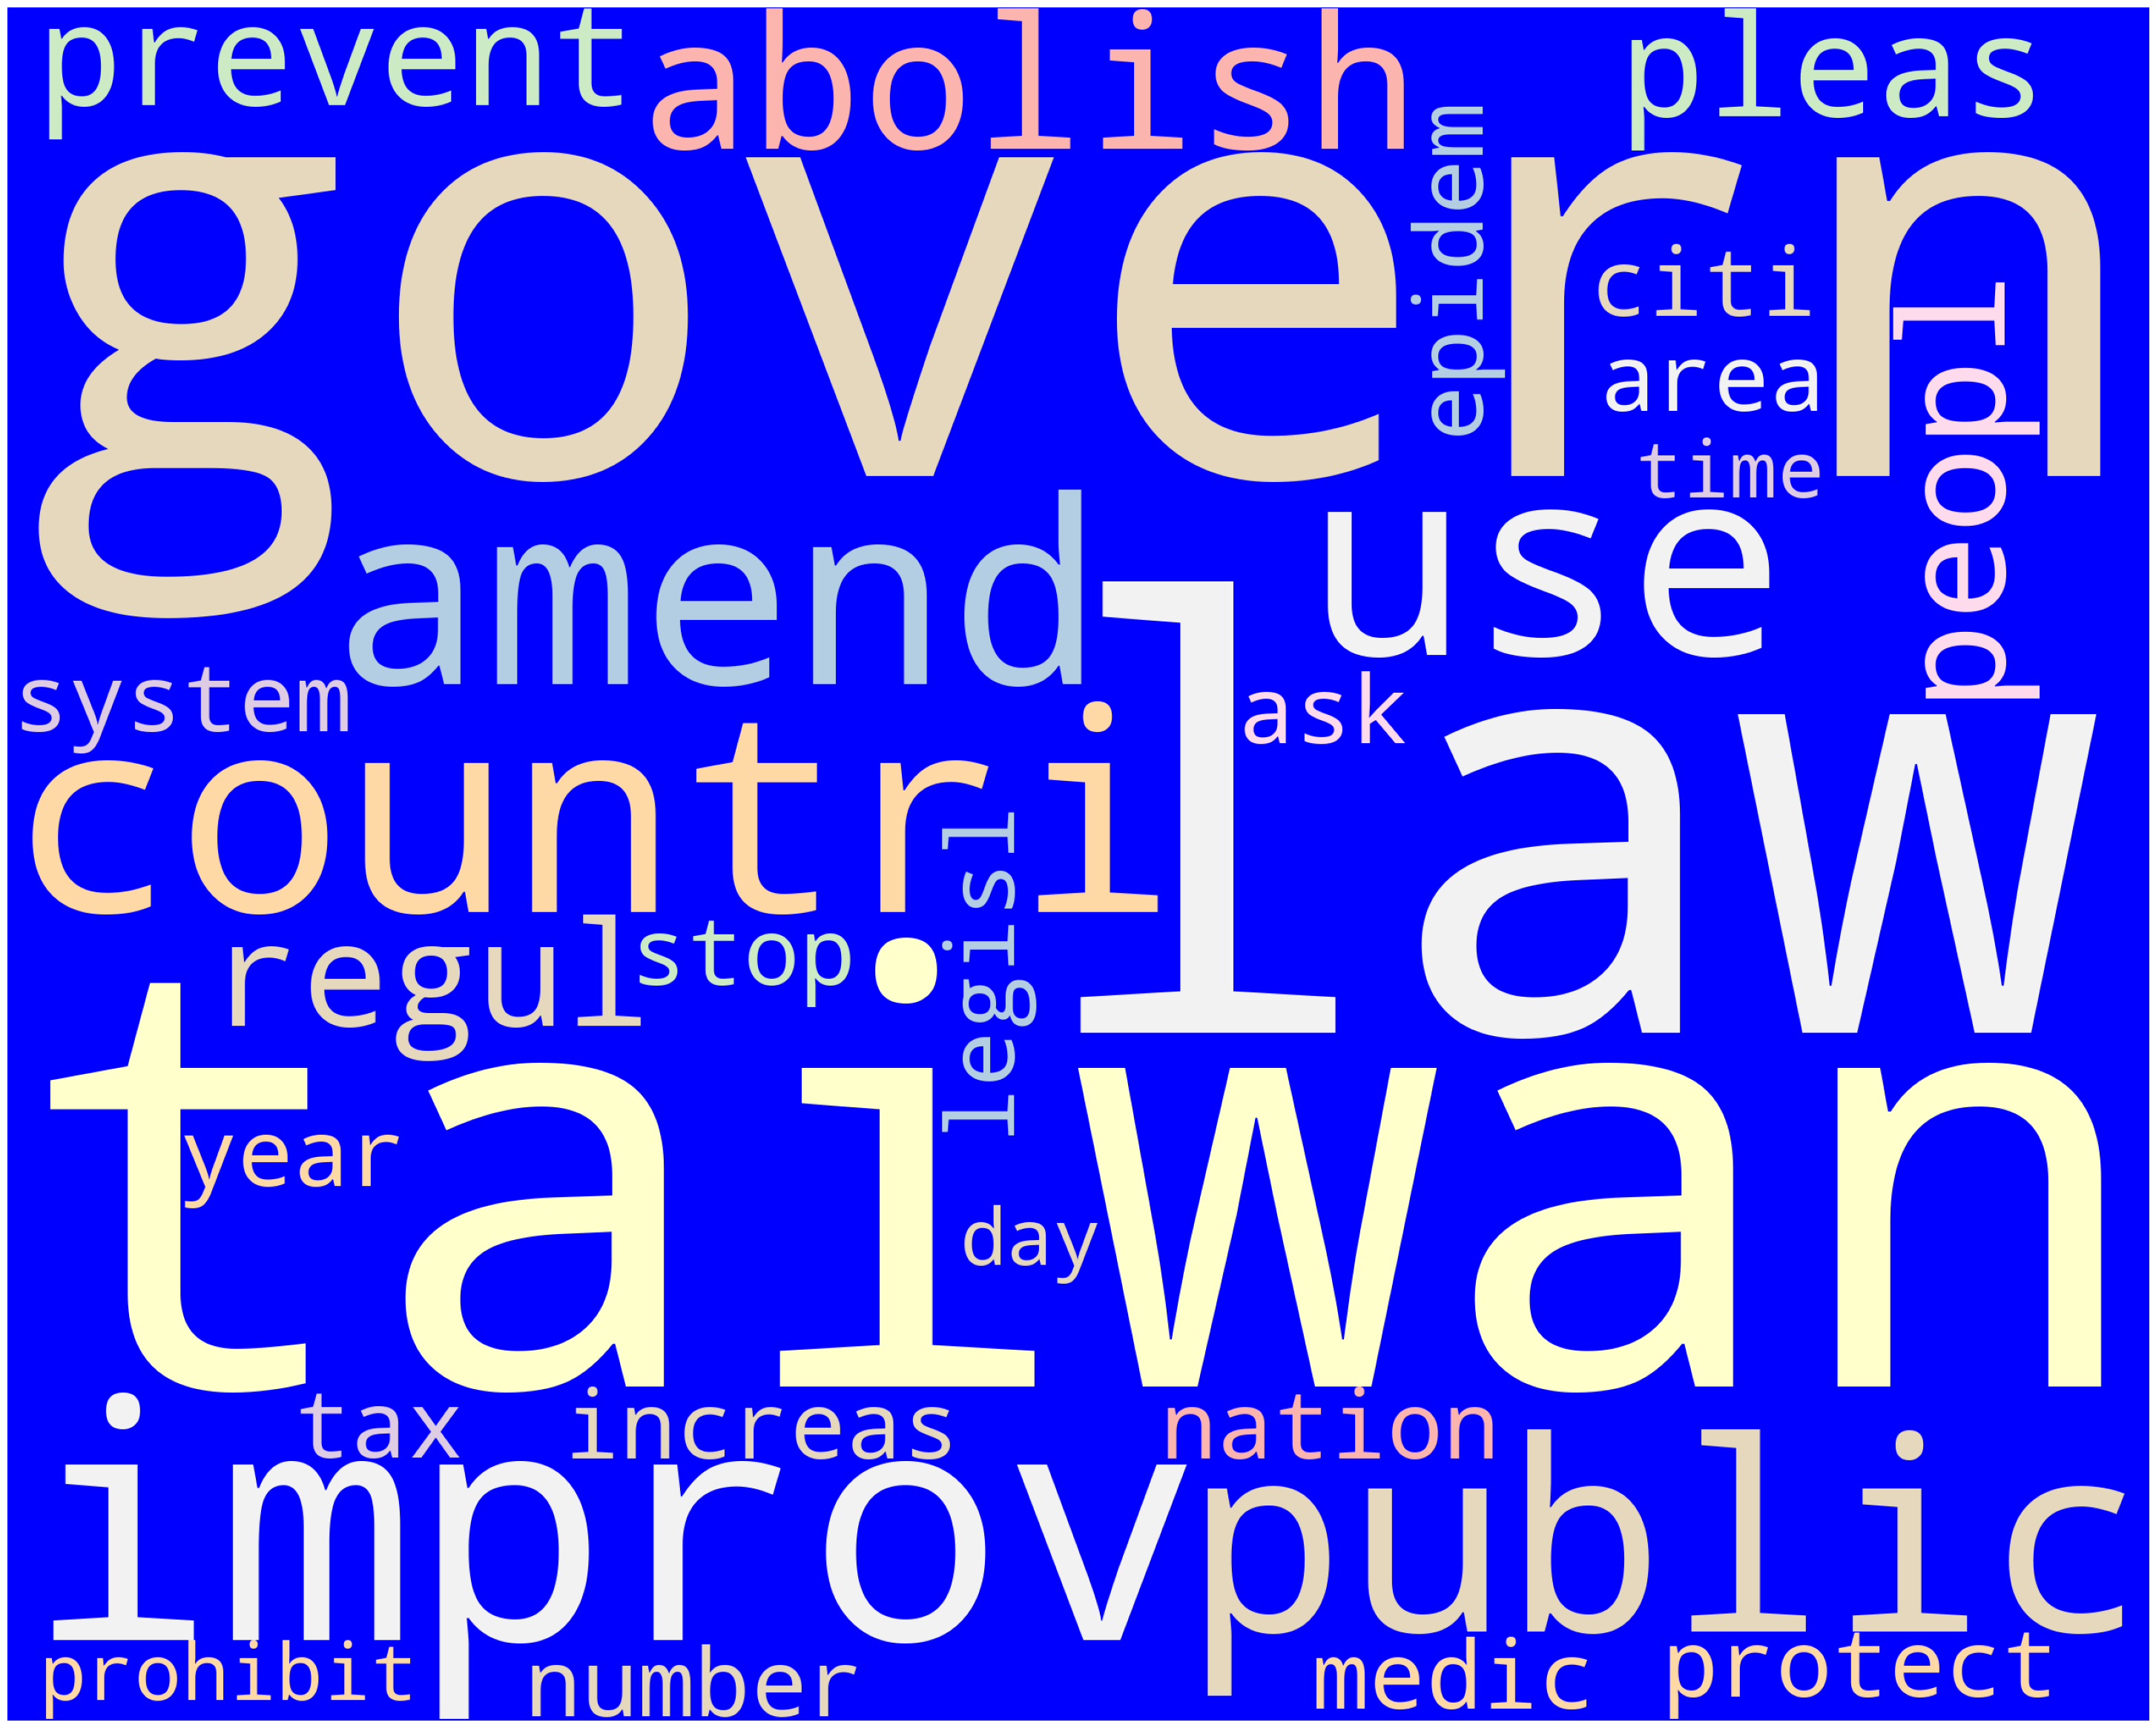

In [207]:
create_wc_topic(1, color="blue", wordN=30)

/home/mojoee/Research/11_UrbanDevelopment/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


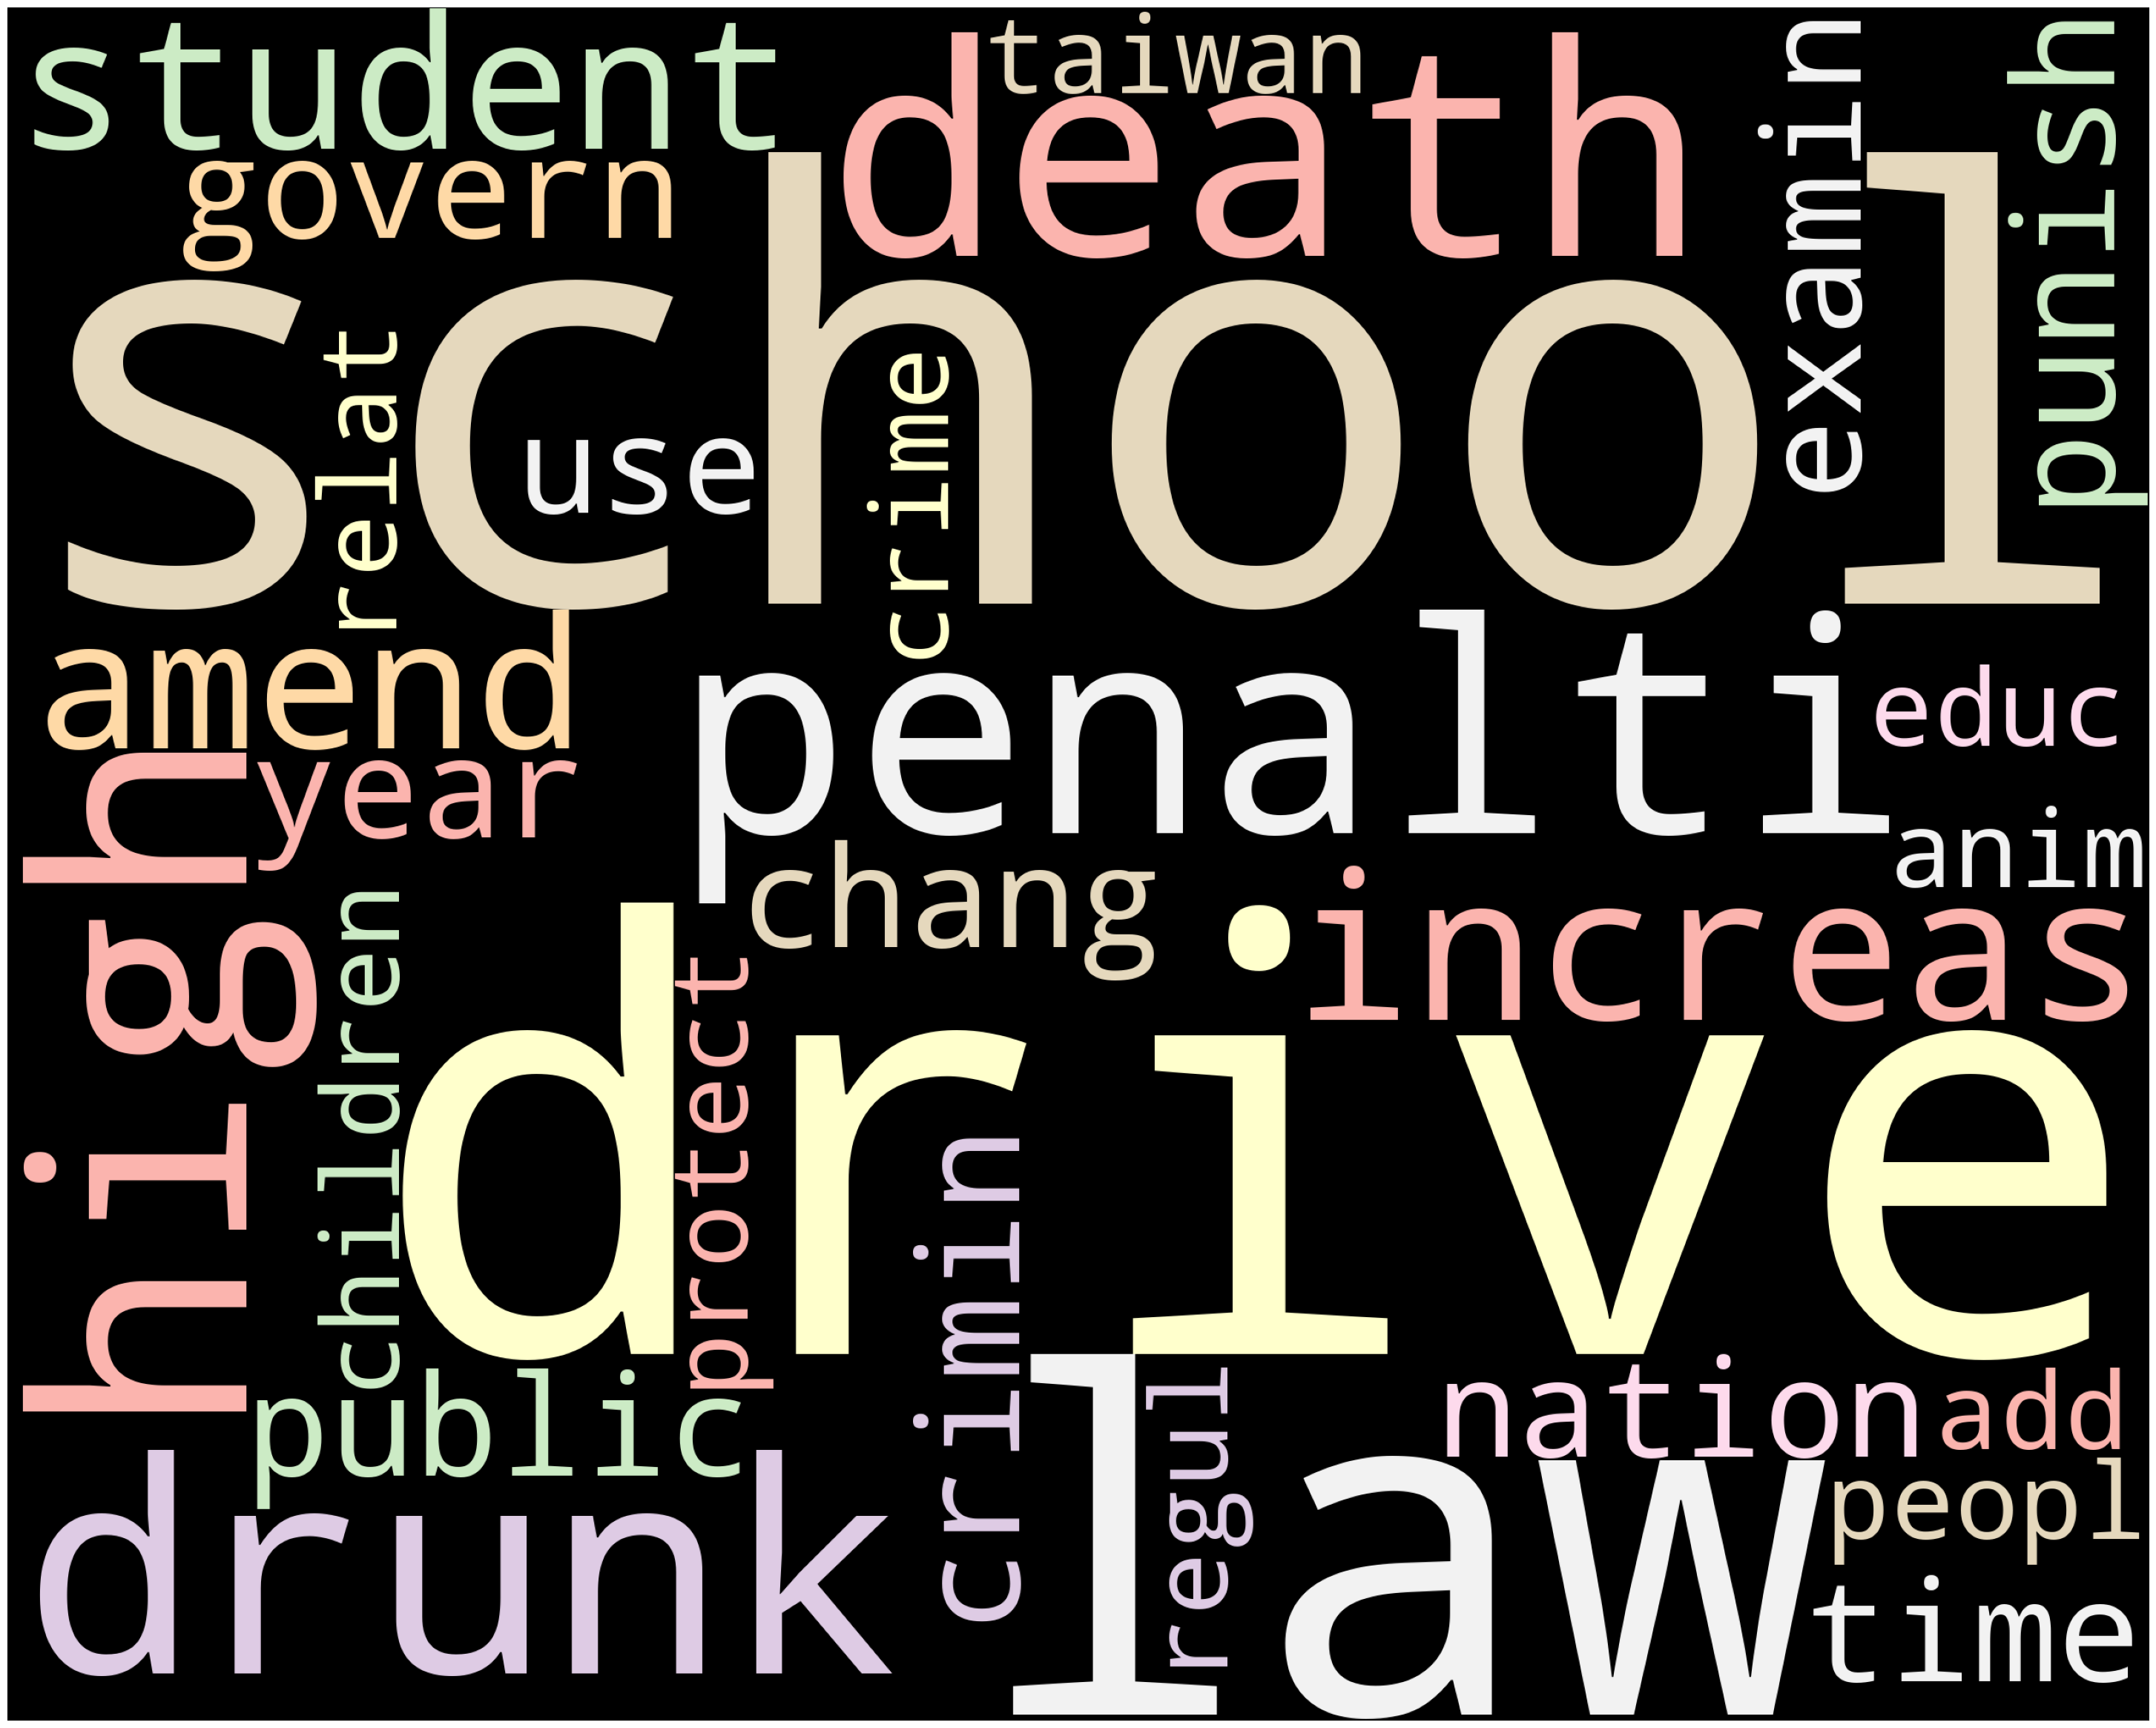

In [208]:
create_wc_topic(2, color="black", wordN=30)

/home/mojoee/Research/11_UrbanDevelopment/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


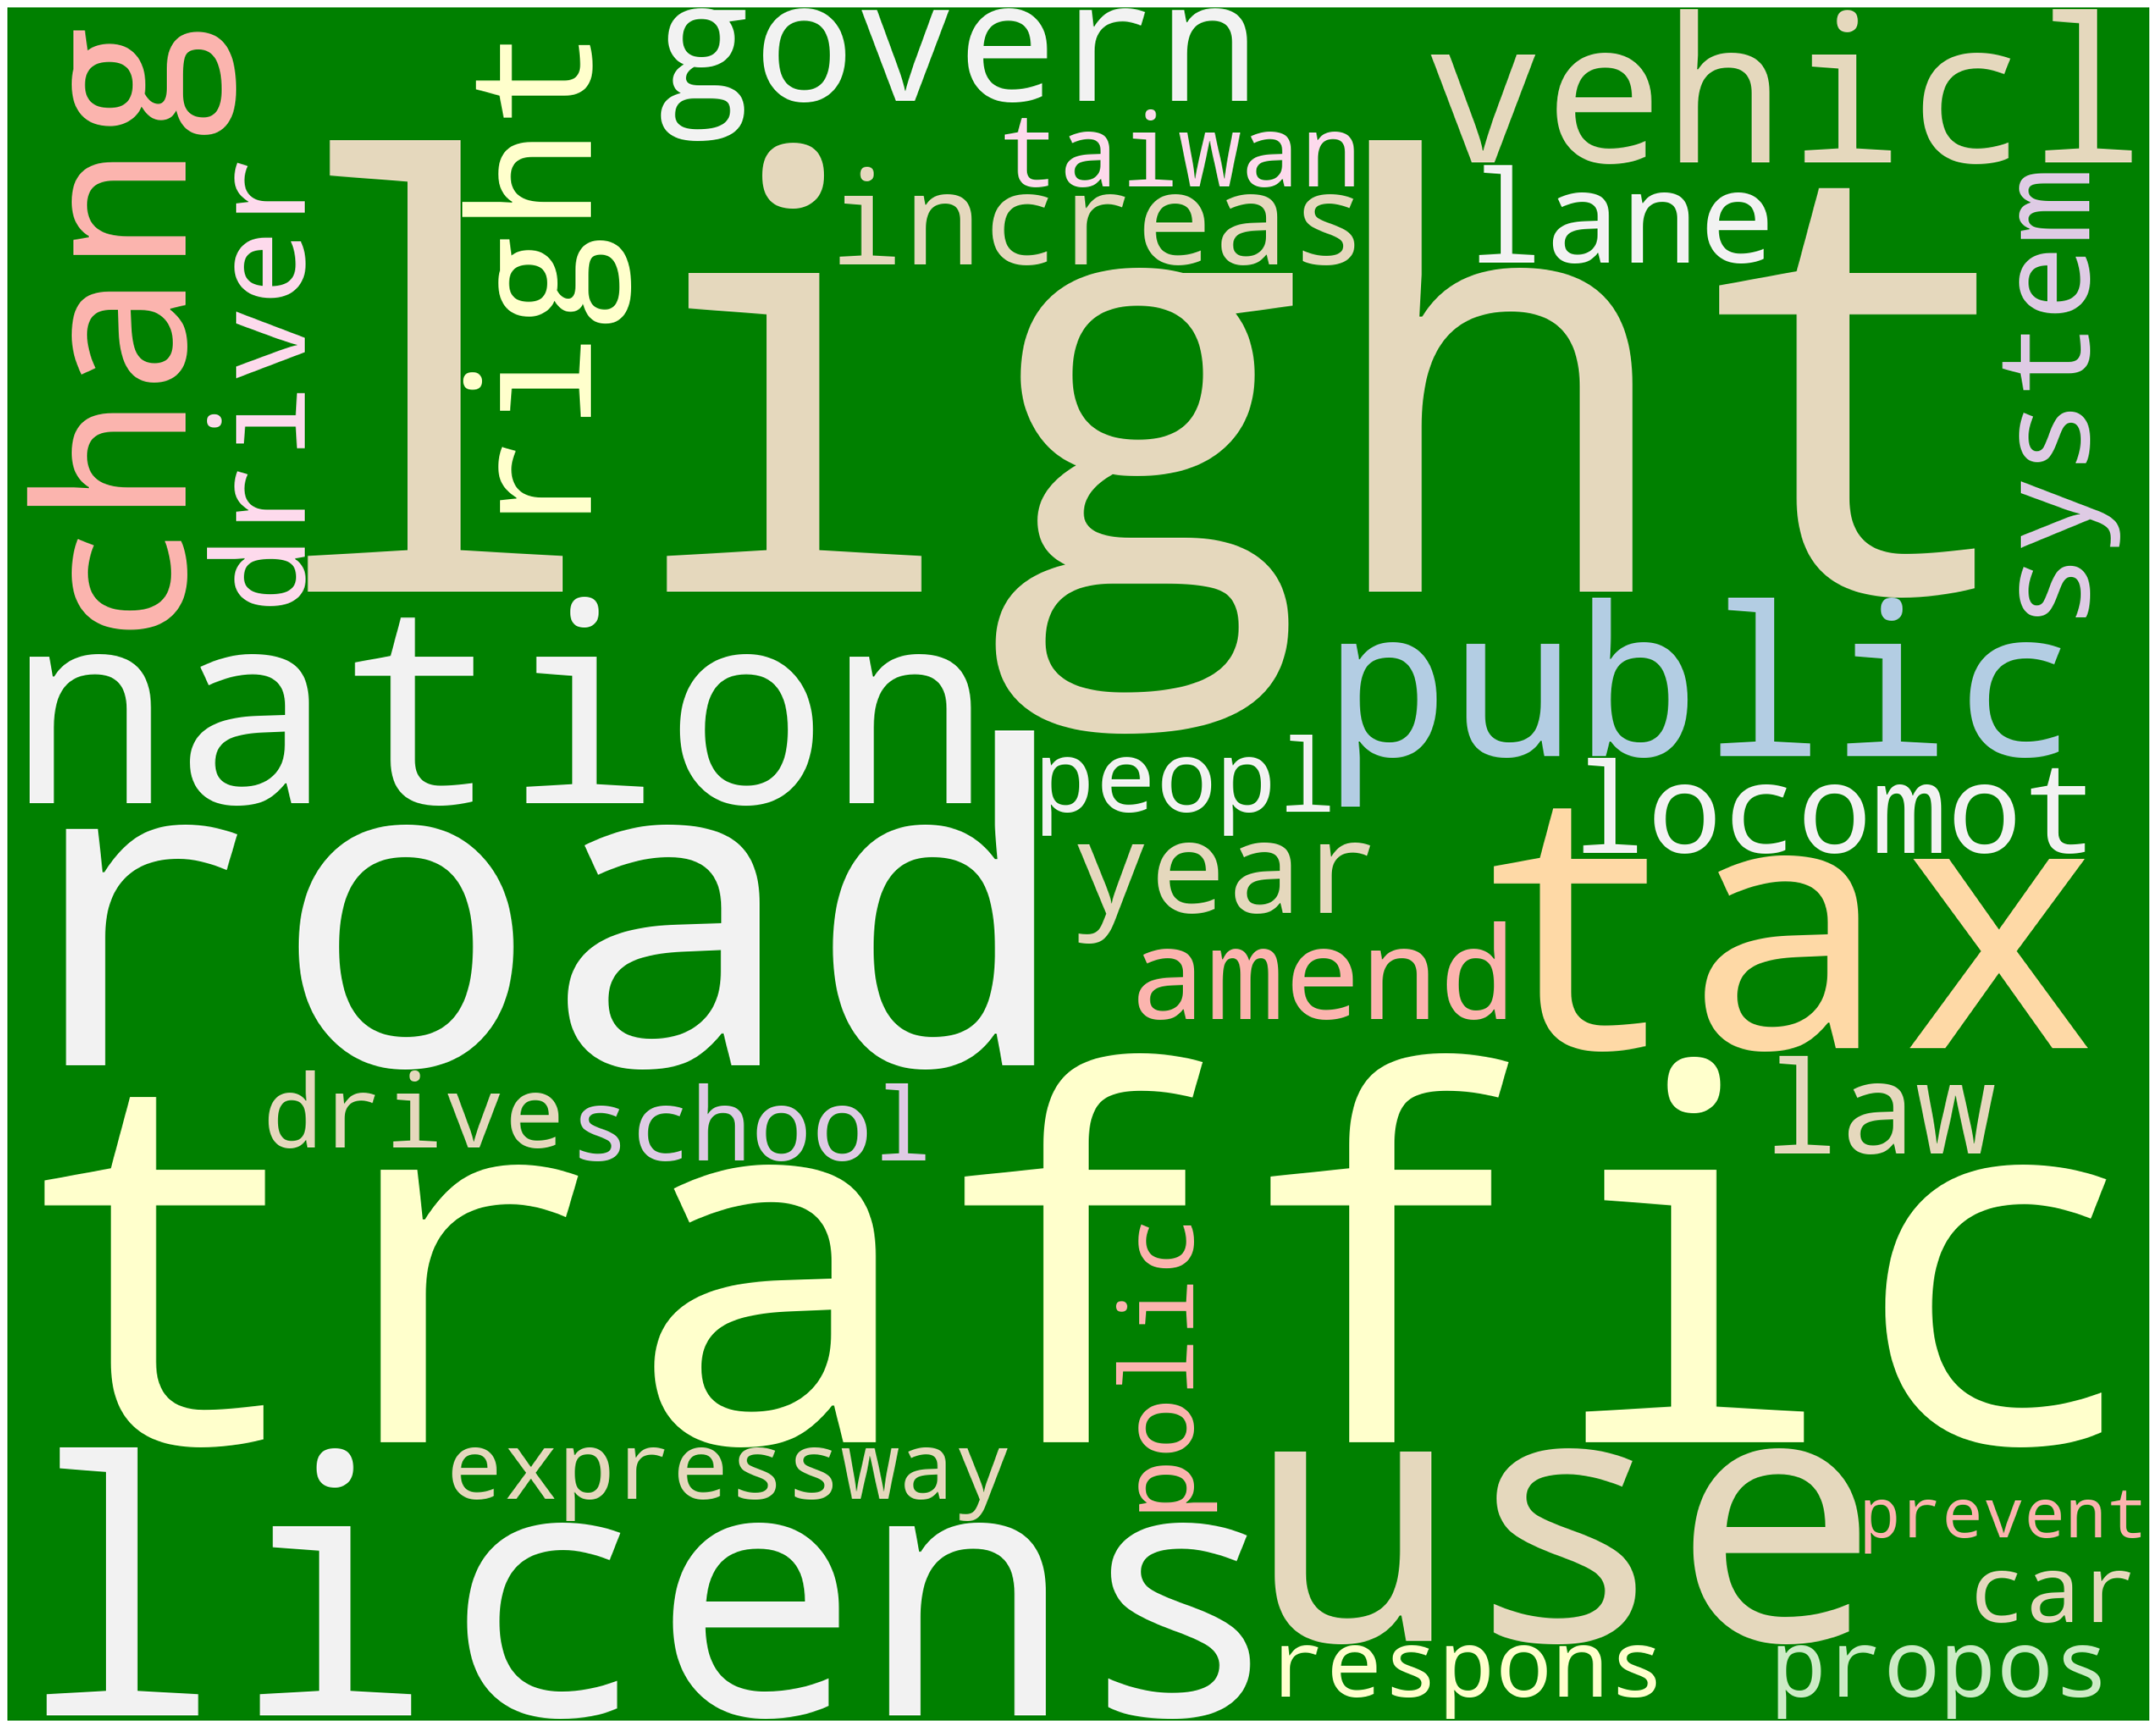

In [209]:
create_wc_topic(3, color="green", wordN=30)

/home/mojoee/Research/11_UrbanDevelopment/03_UrbanDevelopmentTaiwan/.venv/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


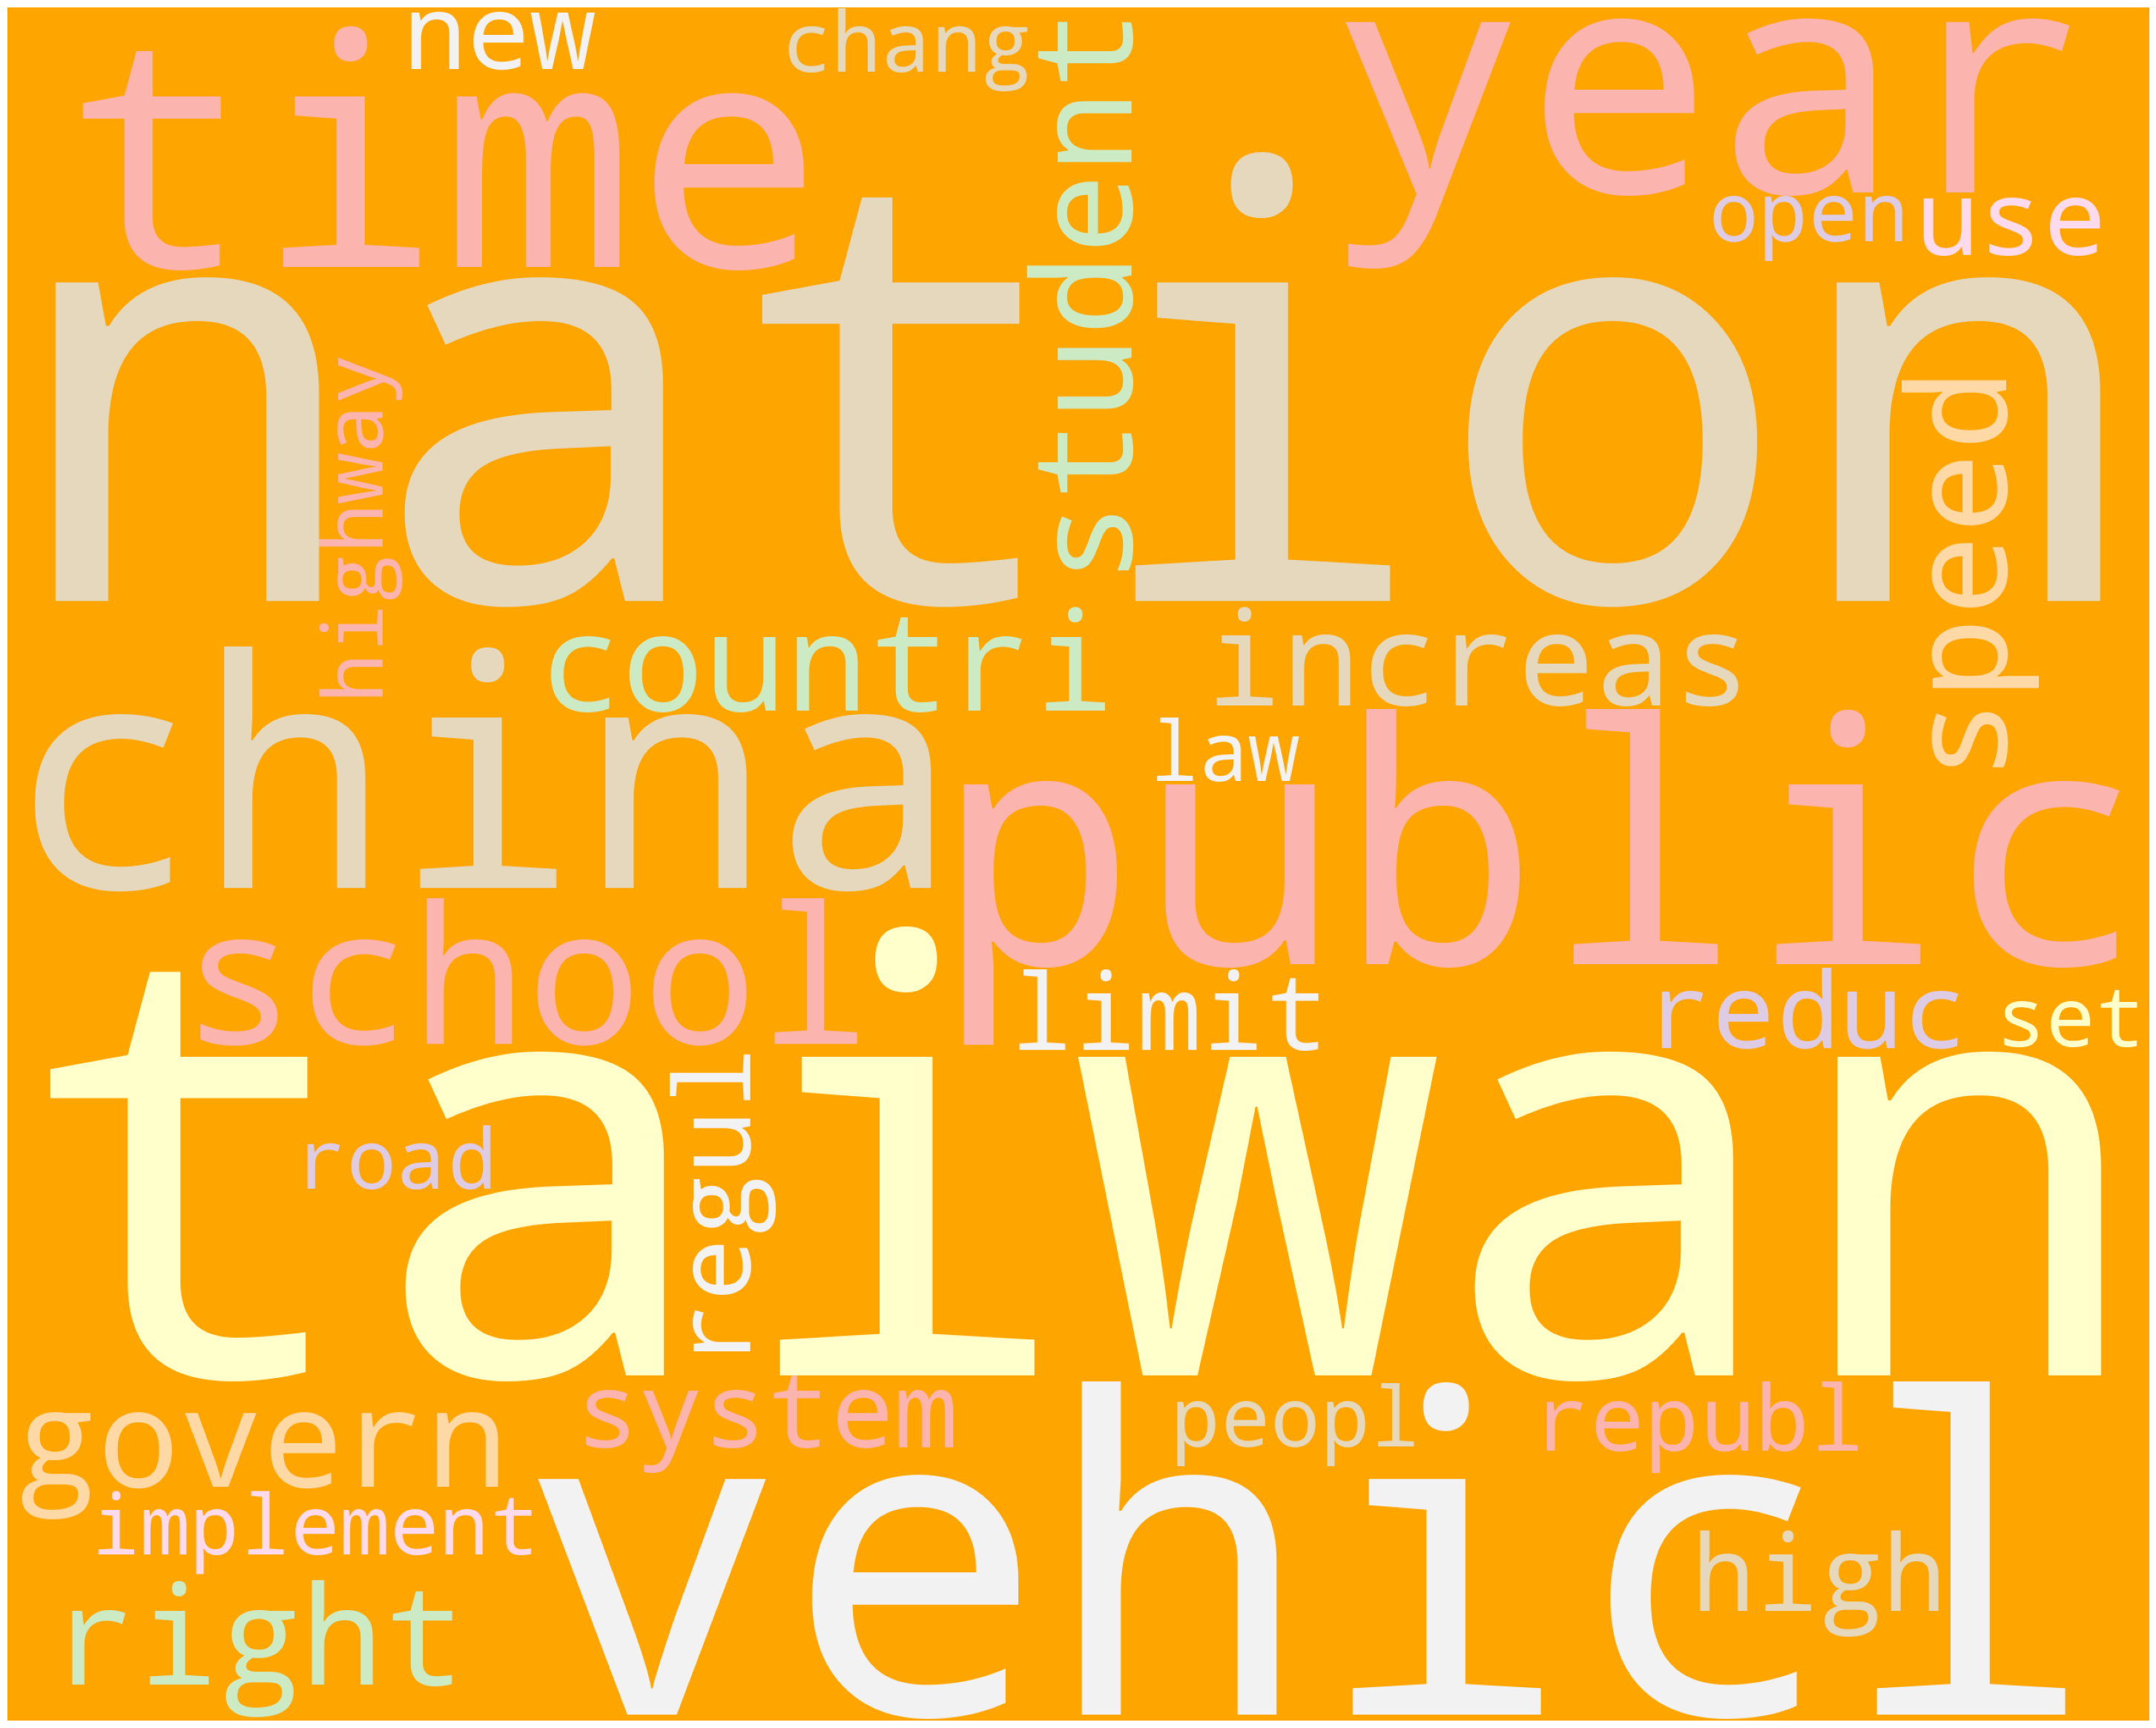

In [210]:
import random
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(num_topics)]
for i in range(num_topics):
    
    create_wc_topic(i, color=colors[i], wordN=30)

In [ ]:
save_data(PassedProposalsTraffic, "./results/PassedProposalsTraffic.csv")
